In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import array
from keras.datasets import mnist

## sklearn.feature_extraction

### [DictVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html?highlight=dictvectorizer)
*Convert a collection of text documents to a matrix of token counts.*

*This transformer turns lists of mappings (dict-like Examples) of feature names to feature values into Numpy arrays or scipy.sparse matrices for use with scikit-learn estimators.*

#### Examples

In [2]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [3]:
v.inverse_transform(X) == [{'bar': 2.0, 'foo': 1.0},
...                            {'baz': 1.0, 'foo': 3.0}]
v.transform({'foo': 4, 'unseen_feature': 3})

array([[0., 0., 4.]])

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
v = DictVectorizer()
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
support = SelectKBest(chi2, k=2).fit(X, [0, 1])
v.get_feature_names_out()

array(['bar', 'baz', 'foo'], dtype=object)

In [5]:
v.restrict(support.get_support())

DictVectorizer()

In [6]:
v.get_feature_names_out()

array(['bar', 'foo'], dtype=object)

#### Methods

##### fit -- <sub><sup>*Learn a vocabulary dictionary of all tokens in the raw documents*</sup></sub>

##### transform -- <sub><sup>*Transform documents to document-term matrix.*</sup></sub>

##### fit_transform -- <sub><sup>*Learn the vocabulary dictionary and return document-term matrix.*</sup></sub>

### [FeatureHasher](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html)

*Implements feature hashing, aka the hashing trick.*

*This class turns sequences of symbolic feature names (strings) into scipy.sparse matrices, using a hash function to compute the matrix column corresponding to a name. The hash function employed is the signed 32-bit version of Murmurhash3.*

In [7]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

## sklearn.feature_extraction.text

### [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidfvectorizer)

*Convert a collection of raw documents to a matrix of TF-IDF features.*

*Equivalent to CountVectorizer followed by TfidfTransformer.*


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [9]:
print(X.shape)

(4, 9)


### [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

*Convert a collection of text documents to a matrix of token counts.*

*This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.*


#### Examples

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [11]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


#### Methods

##### fit -- <sub><sup>*Learn a vocabulary dictionary of all tokens in the raw documents.*</sup></sub>


##### transform -- <sub><sup>*Transform documents to document-term matrix.*</sup></sub>


##### fit_transform -- <sub><sup>*learn the vocabulary dictionary and return document-term matrix.*</sup></sub>


#### Attributes

##### vocabulary_ -- <sub><sup>*A mapping of terms to feature indices.*</sup></sub>


## sklearn.feature_selection

### [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html?highlight=variancethreshold)

*Feature selector that removes all low-variance features.*

*This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.*

#### Examples

In [12]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

#### Methods

##### fit -- <sub><sup>*Learn empirical variances from X.*</sup></sub>


##### transform-- <sub><sup>*Reduce X to the selected features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>

### [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest)

*Select features according to the k highest scores.*


#### Examples

In [13]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [14]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

#### Methods

##### fit -- <sub><sup>*Run score function on (X, y) and get the appropriate features.*</sup></sub>


##### transform -- <sub><sup>*Reduce X to the selected features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### get_feature_names_out -- <sub><sup>*Mask feature names according to selected features.*</sup></sub>

### [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html?highlight=selectpercentile)

*Select features according to a percentile of the highest scores.*


#### Examples

In [15]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [16]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

#### Methods

##### fit -- <sub><sup>*Run score function on (X, y) and get the appropriate features.*</sup></sub>

##### transform -- <sub><sup>*Reduce X to the selected features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### get_feature_names_out -- <sub><sup>*Mask feature names according to selected features.*</sup></sub>

### [GenericUnivariateSelect](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html?highlight=genericunivariateselect)

*Univariate feature selector with configurable strategy.*


#### Examples

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

In [18]:
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
X_new = transformer.fit_transform(X, y)
X_new.shape

(569, 20)

#### Methods

##### fit -- <sub><sup>*Run score function on (X, y) and get the appropriate features.*</sup></sub>

##### transform -- <sub><sup>*Reduce X to the selected features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### get_feature_names_out -- <sub><sup>*Mask feature names according to selected features.*</sup></sub>

### [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html?highlight=mutual_info_regression)

*Estimate mutual information for a continuous target variable.*

*Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.*

### [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html?highlight=mutual_info_classif)

*Estimate mutual information for a discrete target variable.*

*Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.*

### [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

*Feature ranking with recursive feature elimination.*

#### Examples

In [19]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [20]:
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

#### Methods

##### fit -- <sub><sup>*Fit the RFE model and then the underlying estimator on the selected features.*</sup></sub>


##### transform -- <sub><sup>*Reduce X to the selected features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### get_feature_names_out -- <sub><sup>*Mask feature names according to selected features.*</sup></sub>

### [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)

*Recursive feature elimination with cross-validation to select the number of features.*

#### Examples

In [21]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [22]:
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

#### Methods

##### fit -- <sub><sup>*Fit the RFE model and automatically tune the number of selected features.*</sup></sub>


##### transform -- <sub><sup>*Reduce X to the selected features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### get_feature_names_out -- <sub><sup>*Mask feature names according to selected features.*</sup></sub>

### [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)

*Meta-transformer for selecting features based on importance weights.*

#### Examples

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X = [[ 0.87, -1.34,  0.31 ],
     [-2.79, -0.02, -0.85 ],
     [-1.34, -0.48, -2.55 ],
     [ 1.92,  1.48,  0.65 ]]
y = [0, 1, 0, 1]
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
selector.estimator_.coef_

array([[-0.3252302 ,  0.83462377,  0.49750423]])

In [24]:
selector.threshold_

0.5524527319086915

In [25]:
selector.get_support()

array([False,  True, False])

In [26]:
selector.transform(X)

array([[-1.34],
       [-0.02],
       [-0.48],
       [ 1.48]])

#### Methods

##### fit -- <sub><sup>*Fit the SelectFromModel meta-transformer.*</sup></sub>


##### transform -- <sub><sup>*Reduce X to the selected features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### get_feature_names_out -- <sub><sup>*Mask feature names according to selected features.*</sup></sub>

### [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)

*Transformer that performs Sequential Feature Selection.*

*This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. In the case of unsupervised learning, this Sequential Feature Selector looks only at the features (X), not the desired outputs (y).*

#### Examples

In [27]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)

In [28]:
sfs.get_support()

array([ True, False,  True,  True])

In [29]:
sfs.transform(X).shape

(150, 3)

#### Methods

##### fit -- <sub><sup>*Learn the features to select from X.*</sup></sub>


##### transform -- <sub><sup>*Reduce X to the selected features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### get_feature_names_out -- <sub><sup>*Mask feature names according to selected features.*</sup></sub>

## sklearn.impute

### [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

*Imputation transformer for completing missing values.*


#### Examples

In [30]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


#### Methods

##### fit -- <sub><sup>*Fit the imputer on X.*</sup></sub>

##### transform -- <sub><sup>*Impute all missing values in X.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### statistics_ -- <sub><sup>*The imputation fill value for each feature.*</sup></sub>


### [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

*Imputation for completing missing values using k-Nearest Neighbors.*

*Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.*


#### Examples

In [31]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

#### Methods

##### fit -- <sub><sup>*Fit the imputer on X.*</sup></sub>

##### transform -- <sub><sup>*Impute all missing values in X.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


### [MissingIndicator](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html)

*Binary indicators for missing values.*

*Note that this component typically should not be used in a vanilla Pipeline consisting of transformers and a classifier, but rather could be added using a FeatureUnion or ColumnTransformer.*

#### Examples

In [32]:
import numpy as np
from sklearn.impute import MissingIndicator
X1 = np.array([[np.nan, 1, 3],
               [4, 0, np.nan],
               [8, 1, 0]])
X2 = np.array([[5, 1, np.nan],
               [np.nan, 2, 3],
               [2, 4, 0]])
indicator = MissingIndicator()
indicator.fit(X1)

X2_tr = indicator.transform(X2)
X2_tr

array([[False,  True],
       [ True, False],
       [False, False]])

#### Methods

## sklearn.preprocessing

### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

*Standardize features by removing the mean and scaling to unit variance.*

*The standard score of a sample x is calculated as: z = (x - u) / s*

*where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.*


#### Examples

In [33]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler()


In [34]:
print(scaler.mean_)

[0.5 0.5]


In [35]:
print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [36]:
print(scaler.transform([[2, 2]]))

[[3. 3.]]


#### Methods

##### fit -- <sub><sup>*Compute the mean and std to be used for later scaling.*</sup></sub>


##### partial_fit -- <sub><sup>*Online computation of mean and std on X for later scaling.*</sup></sub>

##### transform -- <sub><sup>*Perform standardization by centering and scaling.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>



### [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

*Transform features by scaling each feature to a given range.*

*This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.*





#### Examples

In [37]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler()


In [38]:
print(scaler.data_max_)

[ 1. 18.]


In [39]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [40]:
print(scaler.transform([[2, 2]]))

[[1.5 0. ]]


#### Methods

##### fit -- <sub><sup>*Compute the minimum and maximum to be used for later scaling.*</sup></sub>


##### partial_fit -- <sub><sup>*Online computation of min and max on X for later scaling.*</sup></sub>

##### transform -- <sub><sup>*Scale features of X according to feature_range.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>



### [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)

*Scale each feature by its maximum absolute value.*

*This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.*

#### Examples

In [41]:
from sklearn.preprocessing import MaxAbsScaler
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
transformer = MaxAbsScaler().fit(X)
transformer

MaxAbsScaler()

In [42]:
transformer.transform(X)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

#### Methods

##### fit -- <sub><sup>*Compute the maximum absolute value to be used for later scaling.*</sup></sub>


##### partial_fit -- <sub><sup>*Online computation of max absolute value of X for later scaling.*</sup></sub>

##### transform -- <sub><sup>*Scale the data.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>



### [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)

*Constructs a transformer from an arbitrary callable.*

*A FunctionTransformer forwards its X (and optionally y) arguments to a user-defined function or function object and returns the result of this function. This is useful for stateless transformations such as taking the log of frequencies, doing custom scaling, etc.*

#### Examples

In [43]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

#### Methods

##### fit -- <sub><sup>*Fit transformer by checking X.*</sup></sub>

##### transform -- <sub><sup>*Transform X using the forward function.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>

### [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

*Generate polynomial and interaction features.*

*Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].*

#### Examples

In [44]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [45]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [46]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

#### Methods

##### fit -- <sub><sup>*Compute number of output features.*</sup></sub>


##### transform -- <sub><sup>*Transform data to polynomial features.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>


##### get_feature_names_out -- <sub><sup>*DEPRECATED.  Do not use.*</sup></sub>

### [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)

*Bin continuous data into intervals.*

#### Examples

In [47]:
from sklearn.preprocessing import KBinsDiscretizer
X = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [48]:
Xt = est.transform(X)
Xt  

array([[0., 0., 0., 0.],
       [1., 1., 1., 0.],
       [2., 2., 2., 1.],
       [2., 2., 2., 2.]])

In [49]:
est.bin_edges_[0]

array([-2., -1.,  0.,  1.])

In [50]:
est.inverse_transform(Xt)

array([[-1.5,  1.5, -3.5, -0.5],
       [-0.5,  2.5, -2.5, -0.5],
       [ 0.5,  3.5, -1.5,  0.5],
       [ 0.5,  3.5, -1.5,  1.5]])

#### Methods

##### fit -- <sub><sup>*Fit the estimator.*</sup></sub>

##### transform -- <sub><sup>*Discretize the data.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>

### [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

*Encode categorical features as a one-hot numeric array.*

*The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)*

#### Examples

In [51]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [52]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [53]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [54]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [55]:
enc.get_feature_names_out(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

One can always drop the first column for each feature.

In [56]:
drop_enc = OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [57]:
drop_enc.transform([['Female', 1], ['Male', 2]]).toarray()

array([[0., 0., 0.],
       [1., 1., 0.]])

Or drop a column for feature only having 2 categories.

In [58]:
drop_binary_enc = OneHotEncoder(drop='if_binary').fit(X)
drop_binary_enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [59]:
drop_binary_enc.transform([['Female', 1], ['Male', 2]]).toarray()

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.]])

#### Methods

##### fit -- <sub><sup>*Fit OneHotEncoder to X.*</sup></sub>

##### transform -- <sub><sup>*Transform X using one-hot encoding.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit OneHotEncoder to X, then transform X.*</sup></sub>

#### Attributes

##### categories_ -- <sub><sup>*The categories of each feature determined during fitting (in order of the features in X and corresponding with the output of transform).*</sup></sub>

### [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

*Encode target labels with value between 0 and n_classes-1.*

*This transformer should be used to encode target values, i.e. y, and not the input X.*

#### Examples

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

LabelEncoder()

In [61]:
le.classes_

array([1, 2, 6])

In [62]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [63]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [64]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [65]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [66]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [67]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

#### Methods

##### fit -- <sub><sup>*Fit label encoder.*</sup></sub>

##### transform -- <sub><sup>*Transform labels to normalized encoding.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit label encoder and return encoded labels.*</sup></sub>

#### Attributes

##### classes_ -- <sub><sup>*Holds the label for each class.*</sup></sub>

### [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

*Encode categorical features as an integer array.*

*The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.*


#### Examples

In [68]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OrdinalEncoder()

In [69]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [70]:
enc.transform([['Female', 3], ['Male', 1]])

array([[0., 2.],
       [1., 0.]])

In [71]:
enc.inverse_transform([[1, 0], [0, 1]])

array([['Male', 1],
       ['Female', 2]], dtype=object)

By default, OrdinalEncoder is lenient towards missing values by propagating them.

In [72]:
import numpy as np
X = [['Male', 1], ['Female', 3], ['Female', np.nan]]
enc.fit_transform(X)

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0., nan]])

#### Methods

##### fit -- <sub><sup>*Fit ordinal encoder.*</sup></sub>

##### transform -- <sub><sup>*Transform X to ordinal codes.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit to data, then transform it.*</sup></sub>

#### Attributes

##### categories_ -- <sub><sup>*The categories of each feature determined during fit (in order of the features in X and corresponding with the output of transform).*</sup></sub>

### [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html)

*Binarize labels in a one-vs-all fashion.*

*Several regression and binary classification algorithms are available in scikit-learn. A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.*

#### Examples

In [73]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([1, 2, 6, 4, 2])

LabelBinarizer()

In [74]:
lb.classes_

array([1, 2, 4, 6])

In [75]:
lb.transform([1, 6])

array([[1, 0, 0, 0],
       [0, 0, 0, 1]])

Binary targets transform to a column vector

In [76]:
lb = preprocessing.LabelBinarizer()
lb.fit_transform(['yes', 'no', 'no', 'yes'])

array([[1],
       [0],
       [0],
       [1]])

Passing a 2D matrix for multilabel classification

In [77]:
import numpy as np
lb.fit(np.array([[0, 1, 1], [1, 0, 0]]))

LabelBinarizer()

In [78]:
lb.classes_

array([0, 1, 2])

In [79]:
lb.transform([0, 1, 2, 1])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

#### Methods

##### fit -- <sub><sup>*Fit label binarizer.*</sup></sub>

##### transform -- <sub><sup>*Transform multi-class labels to binary labels.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit label binarizer/transform multi-class labels to binary labels.*</sup></sub>

#### Attributes

##### classes_ -- <sub><sup>*Holds the label for each class.*</sup></sub>

### [MultiLabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html)

*Transform between iterable of iterables and a multilabel format.*

*Although a list of sets or tuples is a very intuitive format for multilabel data, it is unwieldy to process. This transformer converts between this intuitive format and the supported multilabel format: a (samples x classes) binary matrix indicating the presence of a class label.*

#### Examples

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform([(1, 2), (3,)])

array([[1, 1, 0],
       [0, 0, 1]])

In [81]:
mlb.classes_

array([1, 2, 3])

In [82]:
mlb.fit_transform([{'sci-fi', 'thriller'}, {'comedy'}])

array([[0, 1, 1],
       [1, 0, 0]])

In [83]:
list(mlb.classes_)

['comedy', 'sci-fi', 'thriller']

A common mistake is to pass in a list, which leads to the following issue:

In [84]:
mlb = MultiLabelBinarizer()
mlb.fit(['sci-fi', 'thriller', 'comedy'])  # this is wrong.

MultiLabelBinarizer()

In [85]:
mlb.classes_

array(['-', 'c', 'd', 'e', 'f', 'h', 'i', 'l', 'm', 'o', 'r', 's', 't',
       'y'], dtype=object)

To correct this, the list of labels should be passed in as:

In [86]:
mlb = MultiLabelBinarizer()
mlb.fit([['sci-fi', 'thriller', 'comedy']])

MultiLabelBinarizer()

In [87]:
mlb.classes_

array(['comedy', 'sci-fi', 'thriller'], dtype=object)

#### Methods

##### fit -- <sub><sup>*Fit the label sets binarizer, storing classes_.*</sup></sub>

##### transform -- <sub><sup>*Transform the given label sets.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit the label sets binarizer and transform the given label sets.*</sup></sub>

##### classes_ -- <sub><sup>*A copy of the classes parameter when provided. Otherwise it corresponds to the sorted set of classes found when fitting.*</sup></sub>

### [add_dummy_feature](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.add_dummy_feature.html)

*Augment dataset with an additional dummy feature.*

*This is useful for fitting an intercept term with implementations which cannot otherwise fit it directly.*

In [88]:
from sklearn.preprocessing import add_dummy_feature
add_dummy_feature([[0, 1], [1, 0]])

array([[1., 0., 1.],
       [1., 1., 0.]])

### [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

*Normalize samples individually to unit norm.*

*Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.*

#### Examples

In [89]:
from sklearn.preprocessing import Normalizer
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]
transformer = Normalizer().fit(X)  # fit does nothing.

In [90]:
transformer.transform(X)  # Normalize samples individually to unit norm.

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

## sklearn.compose

### [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

*Applies transformers to columns of an array or pandas DataFrame.*

*This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.*


#### Examples

In [91]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
ct = ColumnTransformer(
    [("norm1", Normalizer(norm='l1'), [0, 1]),
     ("norm2", Normalizer(norm='l1'), slice(2, 4))])
X = np.array([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])
# Normalizer scales each row of X to unit norm. A separate scaling
# is applied for the two first and two last elements of each
# row independently.
ct.fit_transform(X)

array([[0. , 1. , 0.5, 0.5],
       [0.5, 0.5, 0. , 1. ]])

#### Methods

##### fit -- <sub><sup>*Fit all transformers using X.*</sup></sub>

##### transform -- <sub><sup>*Transform X separately by each transformer, concatenate results.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit all transformers, transform the data and concatenate results.*</sup></sub>

### [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html)

*Meta-estimator to regress on a transformed target.*

*Useful for applying a non-linear transformation to the target y in regression problems. This transformation can be given as a Transformer such as the QuantileTransformer or as a function and its inverse such as np.log and np.exp.*

#### Examples

In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
tt = TransformedTargetRegressor(regressor=LinearRegression(),
                                func=np.log, inverse_func=np.exp)
X = np.arange(4).reshape(-1, 1)
y = np.exp(2 * X).ravel()
tt.fit(X, y)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [93]:
tt.score(X, y)

1.0

In [94]:
tt.regressor_.coef_

array([2.])

#### Methods

##### fit -- <sub><sup>*Fit the model according to the given training data.*</sup></sub>


##### predict -- <sub><sup>*Predict using the base regressor, applying inverse.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


## sklearn.linear_model

### [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

*Ordinary least squares Linear Regression.*

*LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.*

#### Examples

In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

In [96]:
reg.score(X, y)

1.0

In [97]:
reg.coef_

array([1., 2.])

In [98]:
reg.intercept_

3.0000000000000018

In [99]:
reg.predict(np.array([[3, 5]]))

array([16.])

#### Methods

##### fit -- <sub><sup>*Fit linear model.*</sup></sub>


##### predict -- <sub><sup>*Predict using the linear model.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

##### coef_ -- <sub><sup>*Estimated coefficients for the linear regression problem.*</sup></sub>


##### intercept_ -- <sub><sup>*Independent term in the linear model. Set to 0.0 if fit_intercept = False.*</sup></sub>

### [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

*Linear model fitted by minimizing a regularized empirical loss with SGD.*

*SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).*

#### Examples

In [100]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [101]:
reg.score(X, y)

0.4588871241710042

In [102]:
reg.predict(np.array([[3, 5, 4, 2, 1]]))

array([0.22856988])

#### Methods

##### fit -- <sub><sup>*Fit linear model with Stochastic Gradient Descent.*</sup></sub>


##### partial_fit -- <sub><sup>*Perform one epoch of stochastic gradient descent on given samples.*</sup></sub>

##### predict -- <sub><sup>*Predict using the linear model.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

##### n_iter_ -- <sub><sup>*The actual number of iterations before reaching the stopping criterion.*</sup></sub>

##### t_ -- <sub><sup>*Number of weight updates performed during training. Same as (n_iter_ * n_samples)*</sup></sub>

##### coef_ -- <sub><sup>*Weights assigned to the features.*</sup></sub>

##### intercept_ -- <sub><sup>*The intercept term.*</sup></sub>

### [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

*Linear Model trained with L1 prior as regularizer (aka the Lasso).*

#### Examples

In [103]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

clf.coef_

array([0.85, 0.  ])

In [104]:
clf.intercept_

0.15000000000000002

#### Methods

##### fit -- <sub><sup>*Fit model with coordinate descent.*</sup></sub>


##### predict -- <sub><sup>*Predict using the linear model.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

##### coef_ -- <sub><sup>*Parameter vector (w in the cost function formula).*</sup></sub>


##### intercept_ -- <sub><sup>*Independent term in decision function.*</sup></sub>

### [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

*Lasso linear model with iterative fitting along a regularization path.*

*The best model is selected by cross-validation.*

#### Examples

In [105]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y)

0.9993566905623871

In [106]:
reg.predict(X[:1,])

array([-78.49519808])

### [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

*Linear least squares with l2 regularization.*

#### Examples

In [107]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge()

In [108]:
clf.score(X, y)

0.6836781050289735

In [109]:
clf.coef_

array([ 0.51088991,  0.03729032, -0.65075201,  0.0930311 ,  0.93380887])

In [110]:
clf.intercept_

0.8958653408297415

In [111]:
clf.predict(np.array([[3, 5, 2, 4, 1]]))

array([2.61941595])

#### Methods

##### fit -- <sub><sup>*Fit Ridge regression model.*</sup></sub>


##### predict -- <sub><sup>*Predict using the linear model.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

##### coef_ -- <sub><sup>*Weight vector(s).*</sup></sub>


##### intercept_ -- <sub><sup>*Independent term in decision function. Set to 0.0 if fit_intercept = False.*</sup></sub>

### [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

*Ridge regression with built-in cross-validation.*

*By default, it performs efficient Leave-One-Out Cross-Validation.*

#### Examples

In [112]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
X, y = load_diabetes(return_X_y=True)
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y)

0.5166287840315833

#### Methods

##### fit -- <sub><sup>*Fit Ridge regression model with cv.*</sup></sub>


##### predict -- <sub><sup>*Predict using the linear model.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>

#### Attributes

##### alpha_ -- <sub><sup>*Estimated regularization parameter, or, if alpha_per_target=True, the estimated regularization parameter for each target.*</sup></sub>

##### best_score_ -- <sub><sup>*Score of base estimator with best alpha, or, if alpha_per_target=True, a score for each target.*</sup></sub>

### [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

*Logistic Regression (aka logit, MaxEnt) classifier.*

*In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)*

#### Examples

In [113]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0])

In [114]:
clf.predict_proba(X[:2, :])

array([[9.81801790e-01, 1.81981959e-02, 1.43556907e-08],
       [9.71727348e-01, 2.82726221e-02, 3.00307256e-08]])

In [115]:
clf.score(X, y)

0.9733333333333334

#### Methods

##### fit -- <sub><sup>*Fit the model according to the given training data.*</sup></sub>


##### predict -- <sub><sup>*Predict class labels for samples in X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

##### classes_ -- <sub><sup>*A list of class labels known to the classifier.*</sup></sub>

##### coef_ -- <sub><sup>*Coefficient of the features in the decision function.*</sup></sub>

##### intercept_ -- <sub><sup>*Intercept (a.k.a. bias) added to the decision function.*</sup></sub>

### [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

*Logistic Regression CV (aka logit, MaxEnt) classifier.*

*This class implements logistic regression using liblinear, newton-cg, sag of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2 regularization with primal formulation. The liblinear solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. Elastic-Net penalty is only supported by the saga solver.*

#### Examples

In [116]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
X, y = load_iris(return_X_y=True)
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)
clf.predict(X[:2, :])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0, 0])

In [117]:
clf.predict_proba(X[:2, :]).shape

(2, 3)

In [118]:
clf.score(X, y)

0.98

### [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

*Linear classifiers (SVM, logistic regression, etc.) with SGD training.*

*This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.*

#### Examples

In [119]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [120]:
print(clf.predict([[-0.8, -1]]))

[1]


#### Methods

##### fit -- <sub><sup>*Fit linear model with Stochastic Gradient Descent.*</sup></sub>


##### partial_fit -- <sub><sup>*Perform one epoch of stochastic gradient descent on given samples.*</sup></sub>

##### predict -- <sub><sup>*Predict class labels for samples in X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

##### n_iter_ -- <sub><sup>*The actual number of iterations before reaching the stopping criterion. For multiclass fits, it is the maximum over every binary fit.*</sup></sub>

##### t_ -- <sub><sup>*Number of weight updates performed during training. Same as (n_iter_ * n_samples).*</sup></sub>

##### coef_ -- <sub><sup>*Weights assigned to the features.*</sup></sub>

##### intercept_ -- <sub><sup>*Constants in decision function.*</sup></sub>

### [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

*Classifier using Ridge regression.*

*This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case).*


In [121]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifier().fit(X, y)
clf.score(X, y)

0.9595782073813708

### [RidgeClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html)

*Ridge classifier with built-in cross-validation.*

*By default, it performs Leave-One-Out Cross-Validation. Currently, only the n_features > n_samples case is handled efficiently.*

In [122]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifierCV
X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y)

0.9630931458699473

### [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

*Linear perceptron classifier.*

#### Examples

In [123]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

clf.score(X, y)

0.9393433500278241

#### Methods

##### fit -- <sub><sup>*Fit linear model with Stochastic Gradient Descent.*</sup></sub>


##### partial_fit -- <sub><sup>*Perform one epoch of stochastic gradient descent on given samples.*</sup></sub>

##### predict -- <sub><sup>*Predict class labels for samples in X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels*</sup></sub>


#### Attributes

##### classes_ -- <sub><sup>*The unique classes labels.*</sup></sub>

##### coef_ -- <sub><sup>*Weights assigned to the features.*</sup></sub>

##### intercept_ -- <sub><sup>*Constants in decision function.*</sup></sub>

## sklearn.svm

### [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

*C-Support Vector Classification.*

*The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.*

#### Examples

In [124]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [125]:
print(clf.predict([[-0.8, -1]]))

[1]


#### Methods

##### fit -- <sub><sup>*Fit the SVM model according to the given training data.*</sup></sub>


##### predict -- <sub><sup>*Perform classification on samples in X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

##### classes_ -- <sub><sup>*Multipliers of parameter C for each class. Computed based on the class_weight parameter.*</sup></sub>

##### coef_ -- <sub><sup>*Weights assigned to the features when kernel="linear".*</sup></sub>

##### intercept_ -- <sub><sup>*Constants in decision function.*</sup></sub>

##### support_ -- <sub><sup>*Indices of support vectors.*</sup></sub>

##### support_vectors_ -- <sub><sup>*Support vectors.*</sup></sub>

##### n_support_ -- <sub><sup>*Number of support vectors for each class.*</sup></sub>

### [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

*Linear Support Vector Classification.*

*Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.*

In [126]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [127]:
print(clf.named_steps['linearsvc'].coef_)

[[0.14144316 0.52678399 0.67978685 0.49307524]]


In [128]:
print(clf.named_steps['linearsvc'].intercept_)

[0.16935939]


In [129]:
print(clf.predict([[0, 0, 0, 0]]))

[1]


## sklearn.naive_bayes

### [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

*Naive Bayes classifier for multinomial models.*

*The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.*

In [130]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

In [131]:
print(clf.predict(X[2:3]))

[3]


### [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

*Gaussian Naive Bayes (GaussianNB).*

*Can perform online updates to model parameters via partial_fit. *


In [132]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB()

In [133]:
print(clf.predict([[-0.8, -1]]))

[1]


In [134]:
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

GaussianNB()

In [135]:
print(clf_pf.predict([[-0.8, -1]]))

[1]


### [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

*Naive Bayes classifier for multivariate Bernoulli models.*

*Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.*


In [136]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)

print(clf.predict(X[2:3]))

[3]


### [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html)

*The Complement Naive Bayes classifier described in Rennie et al. (2003).*

*The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.*

In [137]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))

[3]


## sklearn.tree

### [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

*A decision tree classifier.*

#### Examples

In [138]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

#### Methods

##### fit -- <sub><sup>*Build a decision tree classifier from the training set (X, y).*</sup></sub>


##### predict -- <sub><sup>*Predict class or regression value for X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

##### feature_importances_ -- <sub><sup>*Return the feature importances.*</sup></sub>


### [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

*A decision tree regressor.*

#### Examples

In [139]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([-0.39292219, -0.46749346,  0.02768473,  0.06441362, -0.50323135,
        0.16437202,  0.11242982, -0.73798979, -0.30953155, -0.00137327])

#### Methods

##### fit -- <sub><sup>*Build a decision tree regressor from the training set (X, y).*</sup></sub>


##### predict -- <sub><sup>*Predict class or regression value for X.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

##### feature_importances_ -- <sub><sup>*Return the feature importances.*</sup></sub>


## sklearn.neighbors

### [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

*Classifier implementing the k-nearest neighbors vote.*

#### Examples

In [140]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

neigh.predict([[1.1]])

array([0])

In [141]:
neigh.predict_proba([[0.9]])

array([[0.66666667, 0.33333333]])

#### Methods

##### fit -- <sub><sup>*Fit the k-nearest neighbors classifier from the training dataset.*</sup></sub>


##### predict -- <sub><sup>*Predict the class labels for the provided data.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

##### classes_ -- <sub><sup>*Class labels known to the classifier*</sup></sub>


## sklearn.cluster

### [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

*K-Means clustering.*

#### Examples

In [142]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

#### Methods

##### fit -- <sub><sup>*Compute k-means clustering.*</sup></sub>


##### predict -- <sub><sup>*Predict the closest cluster each sample in X belongs to.*</sup></sub>


##### score -- <sub><sup>*Transform X to a cluster-distance space.*</sup></sub>


#### Attributes

##### inertia_ -- <sub><sup>*Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.*</sup></sub>


##### labels_ -- <sub><sup>*Labels of each point*</sup></sub>


##### cluster_centers_ -- <sub><sup>*Coordinates of cluster centers.*</sup></sub>


### [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

*Recursively merges pair of clusters of sample data; uses linkage distance.*

#### Examples

In [143]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
clustering

clustering.labels_

array([1, 1, 1, 0, 0, 0])

#### Methods

##### fit -- <sub><sup>*Fit the hierarchical clustering from features, or distance matrix.*</sup></sub>


##### predict -- <sub><sup>*Fit and return the result of each sample's clustering assignment.*</sup></sub>


#### Attributes

##### n_clusters_ -- <sub><sup>*The number of clusters found by the algorithm.*</sup></sub>


##### labels_ -- <sub><sup>*Cluster labels for each point.*</sup></sub>


##### n_leaves_ -- <sub><sup>*Number of leaves in the hierarchical tree.*</sup></sub>


## sklearn.ensemble

### [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

*A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.*

#### Examples

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


#### Methods

##### fit -- <sub><sup>*Build a forest of trees from the training set (X, y).*</sup></sub>


##### predict -- <sub><sup>*Predict class for X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

##### feature_importances_ -- <sub><sup>*The impurity-based feature importances.*</sup></sub>

### [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

*A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.*

#### Examples

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


#### Methods

##### fit -- <sub><sup>*Build a forest of trees from the training set (X, y).*</sup></sub>


##### predict -- <sub><sup>*Predict regression target for X.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

##### feature_importances_ -- <sub><sup>*The impurity-based feature importances.*</sup></sub>

### [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

*An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.*

#### Examples

In [146]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

clf.predict([[0, 0, 0, 0]])

clf.score(X, y)

0.983

#### Methods

##### fit -- <sub><sup>*Build a boosted classifier from the training set (X, y).*</sup></sub>


##### predict -- <sub><sup>*Predict classes for X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

##### feature_importances_ -- <sub><sup>*The impurity-based feature importances.*</sup></sub>

### [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)

*An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.*

#### Examples

In [147]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X, y)

regr.predict([[0, 0, 0, 0]])

regr.score(X, y)

0.9771376939813695

#### Methods

##### fit -- <sub><sup>*Build a boosted regressor from the training set (X, y).*</sup></sub>


##### predict -- <sub><sup>*Predict regression value for X.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

##### feature_importances_ -- <sub><sup>*The impurity-based feature importances.*</sup></sub>

### [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

*A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.*

#### Examples

In [148]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

#### Methods

##### fit -- <sub><sup>*Build a Bagging ensemble of estimators from the training set (X, y).*</sup></sub>


##### predict -- <sub><sup>*Predict class for X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

### [BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

*Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.*

#### Examples

In [149]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=4,
                       n_informative=2, n_targets=1,
                       random_state=0, shuffle=False)
regr = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=10, random_state=0).fit(X, y)
regr.predict([[0, 0, 0, 0]])

array([-2.87202411])

#### Methods

##### fit -- <sub><sup>*Build a Bagging ensemble of estimators from the training set (X, y).*</sup></sub>


##### predict -- <sub><sup>*Predict regression target for X.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

### [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

*GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.*

#### Examples

In [150]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

#### Methods

##### fit -- <sub><sup>*Fit the gradient boosting model.*</sup></sub>


##### predict -- <sub><sup>*Predict class for X.*</sup></sub>


##### score -- <sub><sup>*Return the mean accuracy on the given test data and labels.*</sup></sub>


#### Attributes

##### feature_importances_ -- <sub><sup>*The impurity-based feature importances.*</sup></sub>

### [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

*GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.*

#### Examples

In [151]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

reg.predict(X_test[1:2])

reg.score(X_test, y_test)

0.4403245677708285

#### Methods

##### fit -- <sub><sup>*Fit the gradient boosting model.*</sup></sub>


##### predict -- <sub><sup>*Predict regression target for X.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


#### Attributes

##### feature_importances_ -- <sub><sup>*The impurity-based feature importances.*</sup></sub>

## sklearn.dummy

### [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

*Regressor that makes predictions using simple rules.*

*This regressor is useful as a simple baseline to compare with other (real) regressors. Do not use it for real problems.*

#### Examples

In [152]:
import numpy as np
from sklearn.dummy import DummyRegressor
X = np.array([1.0, 2.0, 3.0, 4.0])
y = np.array([2.0, 3.0, 5.0, 10.0])
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)

DummyRegressor()

In [153]:
dummy_regr.predict(X)

array([5., 5., 5., 5.])

In [154]:
dummy_regr.score(X, y)

0.0

#### Methods

##### fit -- <sub><sup>*Fit the random regressor.*</sup></sub>


##### predict -- <sub><sup>*Perform classification on test vectors X.*</sup></sub>


##### score -- <sub><sup>*Return the coefficient of determination of the prediction.*</sup></sub>


### [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

*DummyClassifier makes predictions that ignore the input features.*

*This classifier serves as a simple baseline to compare against other more complex classifiers. The specific behavior of the baseline is selected with the strategy parameter.*

In [155]:
import numpy as np
from sklearn.dummy import DummyClassifier
X = np.array([-1, 1, 1, 1])
y = np.array([0, 1, 1, 1])
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [156]:
dummy_clf.predict(X)

array([1, 1, 1, 1])

In [157]:
dummy_clf.score(X, y)

0.75

## sklearn.datasets

### [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

*Load and return the iris dataset (classification).*

*The iris dataset is a classic and very easy multi-class classification dataset.*

In [158]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]

array([0, 0, 1])

In [159]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

### [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)


### [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)


### [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)


### [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)


In [160]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
                  random_state=0)
print(X.shape)

y

(10, 2)


array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])

In [161]:
X, y = make_blobs(n_samples=[3, 3, 4], centers=None, n_features=2,
                  random_state=0)
print(X.shape)

y

(10, 2)


array([0, 1, 2, 0, 2, 2, 2, 1, 1, 0])

### [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)


### [make_multilabel_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_multilabel_classification.html)

## keras.datasets

### [mnist](https://keras.io/api/datasets/mnist/)

*Loads the MNIST dataset.*

*This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.*

In [162]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11501568/11490434 [==============================] - 0s 0us/step


## sklearn.model_selection

### [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

*Split arrays or matrices into random train and test subsets.*

In [163]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [164]:
list(y)

[0, 1, 2, 3, 4]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [166]:
y_train

[2, 0, 3]

In [167]:
X_test

array([[2, 3],
       [8, 9]])

In [168]:
y_test

[1, 4]

In [169]:
train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

### [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

*Evaluate metric(s) by cross-validation and also record fit/score times.*

In [170]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

In [171]:
# Single metric evaluation using cross_validate
cv_results = cross_validate(lasso, X, y, cv=3)
sorted(cv_results.keys())

cv_results['test_score']

array([0.33150734, 0.08022311, 0.03531764])

In [172]:
# Multiple metric evaluation using cross_validate
scores = cross_validate(lasso, X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])

[-3635.51152303 -3573.34242148 -6114.78229547]
[0.28010158 0.39088426 0.22784852]


### [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

*Evaluate a score by cross-validation.*

In [173]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=3))

[0.33150734 0.08022311 0.03531764]


### [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)

*Generate cross-validated estimates for each input data point.*

*The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.*


In [174]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, y, cv=3)

### [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

*Determines cross-validated training and test scores for different training set sizes.*

*A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.*


### [validation_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)

*Determine training and test scores for varying parameter values.*

*Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.*


### [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

*Random permutation cross-validator*

*Yields indices to split data into training and test sets.*


In [175]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])


In [176]:
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X)

print(rs)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)
TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]


In [177]:
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25,
                  random_state=0)
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0] TEST: [5 2]
TRAIN: [4 0 2] TEST: [1 3]
TRAIN: [1 2 4] TEST: [3 5]
TRAIN: [3 4 1] TEST: [5 2]
TRAIN: [3 5 1] TEST: [2 4]


### [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)

*Provides train/test indices to split data in train/test sets.*

*This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.*


#### Examples

In [178]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

print(sss)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)
TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [5 1 4] TEST: [0 2 3]
TRAIN: [5 0 2] TEST: [4 3 1]
TRAIN: [4 1 0] TEST: [2 3 5]
TRAIN: [0 5 1] TEST: [3 4 2]


#### Methods

##### split -- <sub><sup>*Generate indices to split data into training and test set.*</sup></sub>

### [permutation_test_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html)

*Evaluate the significance of a cross-validated score with permutations*

*Permutes targets to generate ‘randomized data’ and compute the empirical p-value against the null hypothesis that features and targets are independent.*

### [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

*Exhaustive search over specified parameter values for an estimator.*

*The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.*

#### Examples

In [179]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

#### Methods

##### fit -- <sub><sup>*Run fit with all sets of parameters.*</sup></sub>


##### predict -- <sub><sup>*Call predict on the estimator with the best found parameters.*</sup></sub>


##### transform -- <sub><sup>*Call transform on the estimator with the best found parameters.*</sup></sub>


#### Attributes

##### cv_results_ (only after fit) -- <sub><sup>*A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.*</sup></sub>

##### best_index_ -- <sub><sup>*The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.*</sup></sub>


##### best_estimator_ -- <sub><sup>Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.*</sup></sub>


##### best_params_ -- <sub><sup>*Parameter setting that gave the best results on the hold out data.*</sup></sub>


##### best_score_ -- <sub><sup>*Mean cross-validated score of the best_estimator*</sup></sub>

### [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

*The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.*

*In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.*

#### Examples

In [180]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

#### Methods

##### fit -- <sub><sup>*Run fit with all sets of parameters.*</sup></sub>


##### predict -- <sub><sup>*Call predict on the estimator with the best found parameters.*</sup></sub>


##### transform -- <sub><sup>*Call transform on the estimator with the best found parameters.*</sup></sub>


#### Attributes

##### cv_results_ (only after fit) -- <sub><sup>*A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.*</sup></sub>

##### best_index_ -- <sub><sup>*The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.*</sup></sub>


##### best_estimator_ -- <sub><sup>Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.*</sup></sub>


##### best_params_ -- <sub><sup>*Parameter setting that gave the best results on the hold out data.*</sup></sub>


##### best_score_ -- <sub><sup>*Mean cross-validated score of the best_estimator*</sup></sub>

## sklearn.metrics

### [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

*Mean squared error regression loss.*

In [181]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [182]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred, squared=False)

0.6123724356957945

In [183]:
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
mean_squared_error(y_true, y_pred)

0.7083333333333334

In [184]:
mean_squared_error(y_true, y_pred, squared=False)

0.8227486121839513

In [185]:
mean_squared_error(y_true, y_pred, multioutput='raw_values')

array([0.41666667, 1.        ])

In [186]:
mean_squared_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.825

### [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

*Mean absolute error regression loss.*

In [187]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [188]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_absolute_error(y_true, y_pred)

0.75

In [189]:
mean_absolute_error(y_true, y_pred, multioutput='raw_values')

array([0.5, 1. ])

In [190]:
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.85

### [mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)

*Note here that the output is not a percentage in the range [0, 100] and a value of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily high when y_true is small (which is specific to the metric) or when abs(y_true - y_pred) is large (which is common for most regression metrics).*


In [191]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_percentage_error(y_true, y_pred)

0.3273809523809524

In [192]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_absolute_percentage_error(y_true, y_pred)

0.5515873015873016

In [193]:
mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.6198412698412699

In [194]:
# the value when some element of the y_true is zero is arbitrarily high because
# of the division by epsilon
y_true = [1., 0., 2.4, 7.]
y_pred = [1.2, 0.1, 2.4, 8.]
mean_absolute_percentage_error(y_true, y_pred)

112589990684262.48

### [log_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)

*This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true. The log loss is only defined for two or more labels.*


In [195]:
from sklearn.metrics import log_loss
log_loss(["spam", "ham", "ham", "spam"],
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

### [hinge_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html)

*Average hinge loss (non-regularized).*

*The cumulated hinge loss is therefore an upper bound of the number of mistakes made by the classifier.*

In [196]:
from sklearn import svm
from sklearn.metrics import hinge_loss
X = [[0], [1]]
y = [-1, 1]
est = svm.LinearSVC(random_state=0)
est.fit(X, y)

LinearSVC(random_state=0)

In [197]:
pred_decision = est.decision_function([[-2], [3], [0.5]])
pred_decision

array([-2.18177944,  2.36355888,  0.09088972])

In [198]:
hinge_loss([-1, 1, 1], pred_decision)

0.3030367603854425

In the multiclass case:

In [199]:
import numpy as np
X = np.array([[0], [1], [2], [3]])
Y = np.array([0, 1, 2, 3])
labels = np.array([0, 1, 2, 3])
est = svm.LinearSVC()
est.fit(X, Y)

LinearSVC()

In [200]:
pred_decision = est.decision_function([[-1], [2], [3]])
pred_decision

array([[ 1.27272343,  0.03420636, -0.68377227, -1.40168139],
       [-1.45454469, -0.58124965, -0.37606558, -0.17099036],
       [-2.36363406, -0.78640166, -0.27349668,  0.23923999]])

In [201]:
y_true = [0, 2, 3]
hinge_loss(y_true, pred_decision, labels=labels)

0.5641128511021872

### [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [202]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [203]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In the binary case, we can extract true positives, etc as follows:

In [204]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

### [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

*Compute confusion matrix to evaluate the accuracy of a classification.*

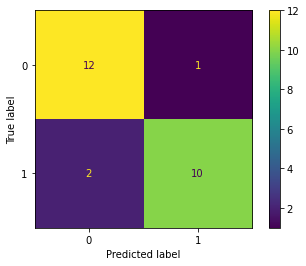

In [205]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

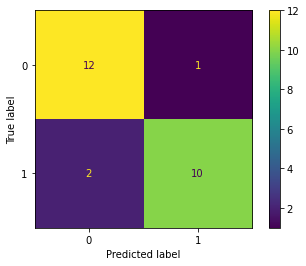

In [206]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test)

plt.show()

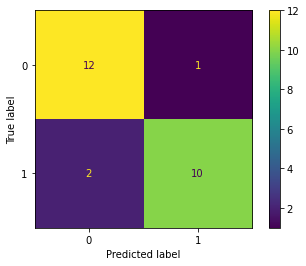

In [207]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred)

plt.show()

### [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

*The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.*

*The best value is 1 and the worst value is 0.*

In [208]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')

0.2222222222222222

In [209]:
precision_score(y_true, y_pred, average='micro')

0.3333333333333333

In [210]:
precision_score(y_true, y_pred, average='weighted')

0.2222222222222222

In [211]:
precision_score(y_true, y_pred, average=None)

array([0.66666667, 0.        , 0.        ])

In [212]:
y_pred = [0, 0, 0, 0, 0, 0]
precision_score(y_true, y_pred, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.33333333, 0.        , 0.        ])

In [213]:
precision_score(y_true, y_pred, average=None, zero_division=1)

array([0.33333333, 1.        , 1.        ])

In [214]:
# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
precision_score(y_true, y_pred, average=None)

array([0.5, 1. , 1. ])

### [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

*The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.*

*The best value is 1 and the worst value is 0.*

In [215]:
from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

0.3333333333333333

In [216]:
recall_score(y_true, y_pred, average='micro')

0.3333333333333333

In [217]:
recall_score(y_true, y_pred, average='weighted')

0.3333333333333333

In [218]:
recall_score(y_true, y_pred, average=None)

array([1., 0., 0.])

In [219]:
y_true = [0, 0, 0, 0, 0, 0]
recall_score(y_true, y_pred, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.5, 0. , 0. ])

In [220]:
recall_score(y_true, y_pred, average=None, zero_division=1)

array([0.5, 1. , 1. ])

In [221]:
# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
recall_score(y_true, y_pred, average=None)

array([1. , 1. , 0.5])

### [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

*Compute the mean Silhouette Coefficient of all samples.*

*The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.*

*The best value is 1 and the worst value is -1.*

In [222]:
#sklearn.metrics.silhouette_score(X, labels)

### [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) 

*This factory function wraps scoring functions for use in GridSearchCV and cross_val_score. It takes a score function, such as accuracy_score, mean_squared_error, adjusted_rand_score or average_precision_score and returns a callable that scores an estimator’s output. The signature of the call is (estimator, X, y) where estimator is the model to be evaluated, X is the data and y is the ground truth labeling (or None in the case of unsupervised models).*

In [223]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
                    scoring=ftwo_scorer)

### [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

*Build a text report showing the main classification metrics.*

In [225]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [226]:
y_pred = [1, 1, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3], digits=4)) # precision of 4 decimals.

              precision    recall  f1-score   support

           1     1.0000    0.6667    0.8000         3
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000         0

   micro avg     1.0000    0.6667    0.8000         3
   macro avg     0.3333    0.2222    0.2667         3
weighted avg     1.0000    0.6667    0.8000         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

### [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

*Compute precision-recall pairs for different probability thresholds.*

*Note: this implementation is restricted to the binary classification task.*

In [227]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(
    y_true, y_scores)
precision

array([0.66666667, 0.5       , 1.        , 1.        ])

In [228]:
recall

array([1. , 0.5, 0.5, 0. ])

In [229]:
thresholds

array([0.35, 0.4 , 0.8 ])

### [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

*Compute Receiver operating characteristic (ROC).*

In [230]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [231]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

In [232]:
thresholds

array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

### [plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)

*DEPRECATED.  Do not use!*


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


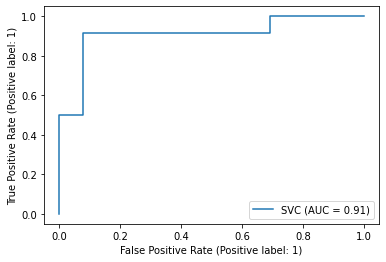

In [233]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test) 

plt.show()

## sklearn.decomposition

### [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

*Principal component analysis (PCA).*

*Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.*

#### Examples

In [234]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [235]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [236]:
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289]
[6.30061232]


#### Methods

##### fit -- <sub><sup>*Fit the model with X.*</sup></sub>


##### transform -- <sub><sup>*Apply dimensionality reduction to X.*</sup></sub>


##### fit_transform -- <sub><sup>*Fit the model with X and apply the dimensionality reduction on X.*</sup></sub>


#### Attributes

##### explained_variance_ -- <sub><sup>*The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.  Equal to n_components largest eigenvalues of the covariance matrix of X.*</sup></sub>

## sklearn.pipeline

### [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

*This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.*

In [237]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
make_pipeline(StandardScaler(), GaussianNB(priors=None))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

### [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

*Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.*

#### Examples

In [238]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.88

#### Methods

##### fit -- <sub><sup>*Fit the model.*</sup></sub>

##### transform -- <sub><sup>*Transform the data, and apply transform with the final estimator.*</sup></sub>

##### fit_transform -- <sub><sup>*Fit the model and transform with the final estimator.*</sup></sub>

##### score -- <sub><sup>*Transform the data, and apply score with the final estimator.*</sup></sub>

### [FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)

*This estimator applies a list of transformer Examples in parallel to the input data, then concatenates the results. This is useful to combine several feature extraction mechanisms into a single transformer.*

In [239]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
union = FeatureUnion([("pca", PCA(n_components=1)),
                      ("svd", TruncatedSVD(n_components=2))])
X = [[0., 1., 3], [2., 2., 5]]
union.fit_transform(X)

array([[ 1.5       ,  3.03954967,  0.87243213],
       [-1.5       ,  5.72586357, -0.46312679]])

## sklearn.set_config

### [set_config](https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html)

*Set global scikit-learn configuration*

## sklearn.utils

### [all_estimators](https://scikit-learn.org/stable/modules/generated/sklearn.utils.all_estimators.html)

*Get a list of all estimators from sklearn.*

## sklearn.utils.multiclass

### [type_of_target](https://scikit-learn.org/stable/modules/generated/sklearn.utils.multiclass.type_of_target.html)

*Determine the type of data indicated by the target.*

In [240]:
from sklearn.utils.multiclass import type_of_target
import numpy as np
type_of_target([0.1, 0.6])

'continuous'

In [241]:
type_of_target([1, -1, -1, 1])

'binary'

In [242]:
type_of_target(['a', 'b', 'a'])

'binary'

In [243]:
type_of_target([1.0, 2.0])

'binary'

In [244]:
type_of_target([1, 0, 2])

'multiclass'

In [245]:
type_of_target([1.0, 0.0, 3.0])

'multiclass'

In [246]:
type_of_target(['a', 'b', 'c'])

'multiclass'

In [247]:
type_of_target(np.array([[1, 2], [3, 1]]))

'multiclass-multioutput'

In [248]:
type_of_target([[1, 2]])

'multilabel-indicator'

In [249]:
type_of_target(np.array([[1.5, 2.0], [3.0, 1.6]]))

'continuous-multioutput'

In [250]:
type_of_target(np.array([[0, 1], [1, 1]]))

'multilabel-indicator'

## scipy.stats

### [uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

*A uniform continuous random variable.*

*In the standard form, the distribution is uniform on [0, 1]. Using the parameters loc and scale, one obtains the uniform distribution on [loc, loc + scale].*

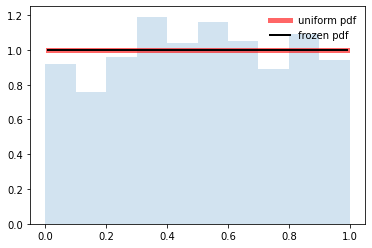

In [251]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Calculate the first four moments:
mean, var, skew, kurt = uniform.stats(moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
# This returns a “frozen” RV object holding the given parameters fixed.
#Freeze the distribution and display the frozen pdf.

rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = uniform.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

# Generate random numbers:
r = uniform.rvs(size=1000)

# And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### [loguniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loguniform.html)

*A loguniform or reciprocal continuous random variable.*

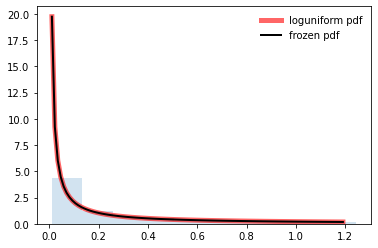

In [252]:
from scipy.stats import loguniform
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Calculate the first four moments:
a, b = 0.01, 1.25
mean, var, skew, kurt = loguniform.stats(a, b, moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(loguniform.ppf(0.01, a, b),
                loguniform.ppf(0.99, a, b), 100)
ax.plot(x, loguniform.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='loguniform pdf')

# Freeze the distribution and display the frozen pdf:
rv = loguniform(a, b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf
vals = loguniform.ppf([0.001, 0.5, 0.999], a, b)
np.allclose([0.001, 0.5, 0.999], loguniform.cdf(vals, a, b))

# Generate random numbers:
r = loguniform.rvs(a, b, size=1000)

# And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## scipy.sparse

### [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)

*Compressed Sparse Row matrix*

In [253]:
from scipy.sparse import csr_matrix
csr_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [254]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csr = csr_matrix((data, (row, col)), shape=(3, 3)) # a[row[k], col[k]] = data[k]
csr.toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]])

In [255]:
csr.todense() # converts to matrix object

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

## imblearn.under_sampling

### [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

*Under-sample the majority class(es) by randomly picking samples with or without replacement.*

#### Examples

In [256]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
X, y = make_classification(n_classes=2, class_sep=2,
 weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 900, 0: 100})


In [257]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 100, 1: 100})


#### Methods

##### fit_resample -- <sub><sup>*Resample the dataset.*</sup></sub>

## imblearn.over_sampling

### [RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

*Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.*

#### Examples

In [258]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 900, 0: 100})


In [259]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 900, 1: 900})


#### Methods

##### fit_resample -- <sub><sup>*Resample the dataset.*</sup></sub>

### [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

*Class to perform over-sampling using SMOTE (Synthetic Minority Over-sampling Technique).*

#### Examples

In [260]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 900, 0: 100})


In [261]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 900, 1: 900})


#### Methods

##### fit_resample -- <sub><sup>*Resample the dataset.*</sup></sub>

## warnings

### [filterwarnings](https://stackoverflow.com/questions/29086398/sklearn-turning-off-warnings)

*Turn off warnings in sklearn*

In [262]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## numpy

### [array](https://numpy.org/doc/1.23/reference/generated/numpy.array.html)

*Create an array.*

#### Examples

In [263]:
np.array([1, 2, 3])

array([1, 2, 3])

Upcasting

In [264]:
np.array([1, 2, 3.0])

array([1., 2., 3.])

More than one dimension:

In [265]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

Minimum dimensions 2:

In [266]:
np.array([1, 2, 3], ndmin=2)

array([[1, 2, 3]])

Type provided:

In [267]:
np.array([1, 2, 3], dtype='float64')

array([1., 2., 3.])

#### Methods

##### [shape()](https://numpy.org/doc/1.23/reference/generated/numpy.ndarray.shape.html)

*Tuple of array dimensions.*

In [268]:
x = np.array([1, 2, 3, 4])
x.shape

(4,)

In [269]:
y = np.zeros((2, 3, 4))
y.shape

(2, 3, 4)

In [270]:
y.shape = (3, 8) # similar to reshape
y

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [271]:
try:
  y.shape = (3, 6) # cannot reshape since there're 24 elements.
except ValueError:
  print("Exception!")

Exception!


##### [reshape()](https://numpy.org/doc/1.23/reference/generated/numpy.ndarray.reshape.html)

*Returns an array containing the same data with a new shape.*


In [272]:
y = np.zeros((2, 3, 4))
y.reshape(3, 8)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [273]:
y.reshape((3, 8)) #also works

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

[transpose()](https://numpy.org/doc/1.23/reference/generated/numpy.ndarray.transpose.html)

*Returns a view of the array with axes transposed*

In [274]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [275]:
a.transpose()

array([[1, 3],
       [2, 4]])

In [276]:
a.transpose((1, 0)) # interchanges axes 1 and 0.

array([[1, 3],
       [2, 4]])

In [277]:
a.transpose(1, 0) # also works

array([[1, 3],
       [2, 4]])

In [278]:
a = np.arange(12).reshape(2,3,2)
a.transpose(0,2,1)

array([[[ 0,  2,  4],
        [ 1,  3,  5]],

       [[ 6,  8, 10],
        [ 7,  9, 11]]])

The property T is an accessor to this method

##### [mean()](https://numpy.org/doc/1.23/reference/generated/numpy.ndarray.mean.html), [var()](https://numpy.org/doc/1.23/reference/generated/numpy.ndarray.var.html), [std()](https://numpy.org/doc/1.23/reference/generated/numpy.ndarray.std.html)

*Returns the average, variance and std. deviation respectively of the array elements along given axis.*

##### [ravel()](https://numpy.org/doc/1.23/reference/generated/numpy.ndarray.ravel.html)

*Return a flattened array.*

In [279]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

In [280]:
np.arange(12).reshape(2,3,2).transpose(0,2,1).ravel()

array([ 0,  2,  4,  1,  3,  5,  6,  8, 10,  7,  9, 11])

### [arange](https://numpy.org/doc/1.23/reference/generated/numpy.arange.html)

*Return evenly spaced values within a given interval.*

In [281]:
np.arange(3)

array([0, 1, 2])

In [282]:
np.arange(3.0)

array([0., 1., 2.])

In [283]:
np.arange(3,7)

array([3, 4, 5, 6])

In [284]:
np.arange(3,7,2)

array([3, 5])

In [285]:
np.arange(-3, 3, 0.5)

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5])

### [linspace](https://numpy.org/doc/1.23/reference/generated/numpy.linspace.html)

*Returns num evenly spaced samples, calculated over the interval [start, stop].*


In [286]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [287]:
np.linspace(2.0, 3.0, num=5, endpoint=False)

array([2. , 2.2, 2.4, 2.6, 2.8])

In [288]:
np.linspace(2.0, 3.0, num=5, retstep=True)

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

Graphical illustration

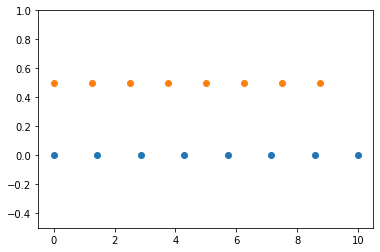

In [289]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')

plt.plot(x2, y + 0.5, 'o')

plt.ylim([-0.5, 1])
plt.show()

### [logspace](https://numpy.org/doc/1.23/reference/generated/numpy.logspace.html)

*Return numbers spaced evenly on a log scale.*

In [290]:
np.logspace(2.0, 3.0, num=4)

array([ 100.        ,  215.443469  ,  464.15888336, 1000.        ])

In [291]:
np.logspace(2.0, 3.0, num=4, endpoint=False)

array([100.        , 177.827941  , 316.22776602, 562.34132519])

In [292]:
np.logspace(2.0, 3.0, num=4, base=2.0)

array([4.        , 5.0396842 , 6.34960421, 8.        ])

Graphical illustration

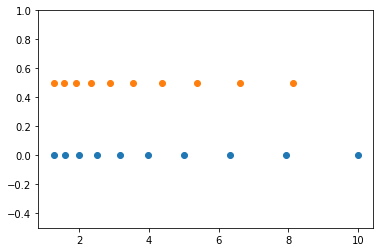

In [293]:
import matplotlib.pyplot as plt
N = 10
x1 = np.logspace(0.1, 1, N, endpoint=True)
x2 = np.logspace(0.1, 1, N, endpoint=False)
y = np.zeros(N)

plt.plot(x1, y, 'o')

plt.plot(x2, y + 0.5, 'o')

plt.ylim([-0.5, 1])
plt.show()

### [unique](https://numpy.org/doc/1.23/reference/generated/numpy.unique.html)

*Returns the sorted unique elements of an array. There are three optional outputs in addition to the unique elements:*

*-the indices of the input array that give the unique values*

*-the indices of the unique array that reconstruct the input array*

*-the number of times each unique value comes up in the input array*

In [294]:
np.unique([1, 1, 2, 2, 3, 3])

array([1, 2, 3])

In [295]:
a = np.array([[1, 1], [2, 3]])
np.unique(a)

array([1, 2, 3])

Return the unique rows of a 2D array

In [296]:
a = np.array([[1, 0, 0], [1, 0, 0], [2, 3, 4]])
np.unique(a, axis=0)

array([[1, 0, 0],
       [2, 3, 4]])

Return the indices of the original array that give the unique values:

In [297]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
u, indices = np.unique(a, return_index=True)
print(u)
print(indices)

['a' 'b' 'c']
[0 1 3]


In [298]:
a[indices]

array(['a', 'b', 'c'], dtype='<U1')

Reconstruct the input values from the unique values and counts:

In [299]:
a = np.array([1, 2, 6, 4, 2, 3, 2])
values, counts = np.unique(a, return_counts=True)
print(values)
print(counts)

[1 2 3 4 6]
[1 3 1 1 1]


In [300]:
np.repeat(values, counts)  # original order not preserved

array([1, 2, 2, 2, 3, 4, 6])

### [zeros](https://numpy.org/doc/1.23/reference/generated/numpy.zeros.html), [ones](https://numpy.org/doc/1.23/reference/generated/numpy.ones.html)

*Return a new array of given shape and type, filled with zeros and ones respectively*


In [301]:
np.zeros((5,), dtype=int)

array([0, 0, 0, 0, 0])

In [302]:
np.ones((5,), dtype=int)

array([1, 1, 1, 1, 1])

In [303]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [304]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [305]:
np.zeros((2,), dtype=[('x', 'i4'), ('y', 'i4')]) # custom dtype

array([(0, 0), (0, 0)], dtype=[('x', '<i4'), ('y', '<i4')])

### [where](https://numpy.org/doc/1.23/reference/generated/numpy.where.html)

*Return elements chosen from x or y depending on condition.*

*When only condition is provided, this function returns indices that match the condition.  In other words, it works is a shorthand for np.asarray(condition).nonzero()*

In [306]:
a = np.arange(10)

np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

This can be used on multidimensional arrays too:

In [307]:
np.where([[True, False], [True, True]],
         [[1, 2], [3, 4]],
         [[9, 8], [7, 6]])

array([[1, 8],
       [3, 4]])

The shapes of x, y, and the condition are broadcast together:

In [308]:
x, y = np.ogrid[:3, :4]

In [309]:
np.where(x < y, x, 10 + y)  # both x and 10+y are broadcast

array([[10,  0,  0,  0],
       [10, 11,  1,  1],
       [10, 11, 12,  2]])

A simple *where* clause yields an tuple of lists; from each list, pick up an index to make co-ordinates.  In this case, following coordinates can be created (0, 0) (0, 1), (0, 2)...(2,1)

In [310]:
a = np.array([[0, 1, 2],
              [0, 2, 4],
              [0, 3, 6]])

np.where(a < 4)

(array([0, 0, 0, 1, 1, 2, 2]), array([0, 1, 2, 0, 1, 0, 1]))

In [311]:
np.where(a < 4, a, -1)  # -1 is broadcast

array([[ 0,  1,  2],
       [ 0,  2, -1],
       [ 0,  3, -1]])

When only condition is provided

In [312]:
a = np.array([[0, 1, 2],
              [0, 2, 4],
              [0, 3, 6]])
np.where(a < 4)

(array([0, 0, 0, 1, 1, 2, 2]), array([0, 1, 2, 0, 1, 0, 1]))

### [argmax](https://numpy.org/doc/1.23/reference/generated/numpy.argmax.html)

*Returns the indices of the maximum values along an axis.*

In [313]:
a = np.arange(6).reshape(2,3) + 10

In [314]:
np.argmax(a)


5

In [315]:
np.argmax(a, axis=0)


array([1, 1, 1])

In [316]:
np.argmax(a, axis=1)

array([2, 2])

In [317]:
# Indexes of the maximal elements of a N-dimensional array
ind = np.unravel_index(np.argmax(a, axis=None), a.shape)
ind

(1, 2)

In [318]:
a[ind]

15

In [319]:
b = np.arange(6)
b[1] = 5
np.argmax(b)  # Only the first occurrence is returned.

1

In [320]:
x = np.array([[4,2,3], [1,0,3]])
index_array = np.argmax(x, axis=-1)
# Same as np.amax(x, axis=-1, keepdims=True)
np.take_along_axis(x, np.expand_dims(index_array, axis=-1), axis=-1)

array([[4],
       [3]])

In [321]:
np.take_along_axis(x, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)

array([4, 3])

In [322]:
# Setting keepdims to True,
x = np.arange(24).reshape((2, 3, 4))
res = np.argmax(x, axis=1)
res.shape

(2, 4)

### [argmin](https://numpy.org/doc/1.23/reference/generated/numpy.argmin.html)

*Returns the indices of the minimum values along an axis.*

In [323]:
a = np.arange(6).reshape(2,3) + 10

In [324]:
np.argmin(a)

0

In [325]:
np.argmin(a, axis=0)

array([0, 0, 0])

In [326]:
np.argmin(a, axis=1)

array([0, 0])

In [327]:
ind = np.unravel_index(np.argmin(a, axis=None), a.shape)
ind

(0, 0)

In [328]:
a[ind]

10

In [329]:
b = np.arange(6) + 10
b[4] = 10
np.argmin(b)  # Only the first occurrence is returned.

0

In [330]:
x = np.array([[4,2,3], [1,0,3]])
index_array = np.argmin(x, axis=-1)
# Same as np.amin(x, axis=-1, keepdims=True)
np.take_along_axis(x, np.expand_dims(index_array, axis=-1), axis=-1)

array([[2],
       [0]])

In [331]:
# Same as np.amax(x, axis=-1)
np.take_along_axis(x, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)

array([2, 0])

### [argsort](https://numpy.org/doc/1.23/reference/generated/numpy.argsort.html)

*Returns the indices that would sort an array.*

*Perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as a that index data along the given axis in sorted order.*

One dimensional array

In [332]:
x = np.array([3, 1, 2])
np.argsort(x)

array([1, 2, 0])

Two dimensional array

In [333]:
x = np.array([[0, 3], [2, 2]])
ind = np.argsort(x, axis=0)  # sorts along first axis (down)
ind

array([[0, 1],
       [1, 0]])

In [334]:
np.take_along_axis(x, ind, axis=0)  # same as np.sort(x, axis=0)

array([[0, 2],
       [2, 3]])

In [335]:
ind = np.argsort(x, axis=1)  # sorts along last axis (across)
ind

array([[0, 1],
       [0, 1]])

In [336]:
np.take_along_axis(x, ind, axis=1)  # same as np.sort(x, axis=1)

array([[0, 3],
       [2, 2]])

Indices of the sorted elements of a N-dimensional array:

In [337]:
ind = np.unravel_index(np.argsort(x, axis=None), x.shape)
ind

(array([0, 1, 1, 0]), array([0, 0, 1, 1]))

In [338]:
x[ind]  # same as np.sort(x, axis=None)

array([0, 2, 2, 3])

Sorting with keys:

In [339]:
x = np.array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')])
x

array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')])

In [340]:
np.argsort(x, order=('x','y'))

array([1, 0])

In [341]:
np.argsort(x, order=('y','x'))

array([0, 1])

### [random.seed](https://numpy.org/doc/1.23/reference/random/generated/numpy.random.seed.html)

*Reseed a legacy MT19937 BitGenerator*

Legacy function

In [342]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
rs = RandomState(MT19937(SeedSequence(123456789)))

In [343]:
# Later, you want to restart the stream
rs = RandomState(MT19937(SeedSequence(987654321)))

In [344]:
rs.choice(100)

33

### [random.permutation](https://numpy.org/doc/1.23/reference/random/generated/numpy.random.permutation.html)

*Randomly permute a sequence, or return a permuted range.*

*If x is a multi-dimensional array, it is only shuffled along its first index.*


In [345]:
np.random.permutation(10)

array([1, 0, 3, 6, 9, 8, 5, 2, 7, 4])

In [346]:
np.random.permutation([1, 4, 9, 12, 15])

array([ 9, 12,  4,  1, 15])

In [347]:
arr = np.arange(9).reshape((3, 3))
np.random.permutation(arr)

array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

### [count_nonzero](https://numpy.org/doc/1.23/reference/generated/numpy.count_nonzero.html)

*Counts the number of non-zero values in the array a.*

In [348]:
np.count_nonzero(np.eye(4))


4

In [349]:
a = np.array([[0, 1, 7, 0],
              [3, 0, 2, 19]])
np.count_nonzero(a)

5

In [350]:
np.count_nonzero(a, axis=0)

array([1, 1, 2, 1])

In [351]:
np.count_nonzero(a, axis=1)

array([2, 3])

In [352]:
np.count_nonzero(a, axis=1, keepdims=True)

array([[2],
       [3]])

### [var](https://numpy.org/doc/1.23/reference/generated/numpy.var.html), [std](https://numpy.org/doc/1.23/reference/generated/numpy.std.html)

*Compute the variance and std. deviation (respectively) on a flattened array (by default) or along the specified axis.*

In [353]:
a = np.array([[1, 2], [3, 4]])
np.var(a)

1.25

In [354]:
np.var(a, axis=0)

array([1., 1.])

In [355]:
np.var(a, axis=1)

array([0.25, 0.25])

In [356]:
a = np.zeros((2, 512*512), dtype=np.float32)
a[0, :] = 1.0
a[1, :] = 0.1
np.var(a)

0.20250003

In [357]:
np.var(a, dtype=np.float64) # variance is more accurate in float

0.2024999993294476

Specifying a where argument:

In [358]:
a = np.array([[14, 8, 11, 10], [7, 9, 10, 11], [10, 15, 5, 10]])
np.var(a)

6.833333333333333

In [359]:
np.var(a, where=[[True], [True], [False]]) # only first two rows

4.0

In [360]:
np.var(a, where=[True, True, False, False]) # only first two columns

8.916666666666666

### [row_stack](https://numpy.org/doc/1.23/reference/generated/numpy.row_stack.html) (vstack)

*Stack arrays in sequence vertically (row wise).*  

*The functions concatenate, stack and block provide more general stacking and concatenation operations.*

In [361]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [362]:
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
np.vstack((a,b))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

### [column_stack](https://numpy.org/doc/1.23/reference/generated/numpy.column_stack.html) (hstack)

*Stack arrays in sequence horizontally (column wise).*  

*The functions concatenate, stack and block provide more general stacking and concatenation operations.*

In [363]:
a = np.array([1,2,3])
b = np.array([2,3,4])
np.column_stack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

## pandas

#### Functions

##### [cut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

*Bin values into discrete intervals.*

In [364]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3) # which bin does each data belong to?

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [365]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True) # also returns the bins

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

In [366]:
# assigns data specific labels, and ordered.
pd.cut(np.array([1, 7, 5, 4, 6, 3]),
       3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [367]:
# Passing a Series as an input returns a Series with categorical dtype:
s = pd.Series(np.array([2, 4, 6, 8, 10]),
              index=['a', 'b', 'c', 'd', 'e'])
pd.cut(s, 3)

a    (1.992, 4.667]
b    (1.992, 4.667]
c    (4.667, 7.333]
d     (7.333, 10.0]
e     (7.333, 10.0]
dtype: category
Categories (3, interval[float64, right]): [(1.992, 4.667] < (4.667, 7.333] < (7.333, 10.0]]

### [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

*Two-dimensional, size-mutable, potentially heterogeneous tabular data.*

*Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.*

#### Examples

In [368]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [369]:
# Notice that the inferred dtype is int64.
df.dtypes

col1    int64
col2    int64
dtype: object

In [370]:
# To enforce a single dtype:
df = pd.DataFrame(data=d, dtype=np.int8)
df.dtypes

col1    int8
col2    int8
dtype: object

In [371]:
# Constructing DataFrame from a dictionary including Series:
d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


In [372]:
# Constructing DataFrame from numpy ndarray:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [373]:
# Constructing DataFrame from a numpy ndarray that has labeled columns:
data = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)],
                dtype=[("a", "i4"), ("b", "i4"), ("c", "i4")])
df3 = pd.DataFrame(data, columns=['c', 'a'])
df3

,c,a
0,3,1
1,6,4
2,9,7


#### Methods

##### [astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

*Cast a pandas object to a specified dtype dtype.*

In [374]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [375]:
# Cast all columns to int32
df.astype('int32').dtypes

col1    int32
col2    int32
dtype: object

In [376]:
# Cast col1 to int32 using a dictionary
df.astype({'col1': 'int32'}).dtypes

col1    int32
col2    int64
dtype: object

In [377]:
ser = pd.Series([1, 2], dtype='int32')
ser.astype('int64')

0    1
1    2
dtype: int64

In [378]:
# int32 to category dtype
ser.astype('category')

0    1
1    2
dtype: category
Categories (2, int64): [1, 2]

##### [dtypes()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

*Return the dtypes in the DataFrame, as a Series with the data type of each column.*

In [379]:
df = pd.DataFrame({'float': [1.0],
                   'int': [1],
                   'datetime': [pd.Timestamp('20180310')],
                   'string': ['foo']})

df.dtypes

float              float64
int                  int64
datetime    datetime64[ns]
string              object
dtype: object

##### [select_dtypes()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

*Return a subset of the DataFrame’s columns based on the column dtypes.*

*- To select all numeric types, use np.number or 'number'*

*- To select strings you must use the object dtype, but note that this will return all object dtype columns*

*- To select datetimes, use np.datetime64, 'datetime' or 'datetime64'*

*- To select Pandas categorical dtypes, use 'category'*

In [380]:
df = pd.DataFrame({'a': [1, 2] * 3,
                   'b': [True, False] * 3,
                   'c': [1.0, 2.0] * 3})
df

,a,b,c
0,1,True,1.0
1,2,False,2.0
2,1,True,1.0
3,2,False,2.0
4,1,True,1.0
5,2,False,2.0


In [381]:
df.select_dtypes(include='bool')

,b
0,True
1,False
2,True
3,False
4,True
5,False


In [382]:
df.select_dtypes(include=['float64'])

,c
0,1.0
1,2.0
2,1.0
3,2.0
4,1.0
5,2.0


In [383]:
df.select_dtypes(exclude=['int64'])

,b,c
0,True,1.0
1,False,2.0
2,True,1.0
3,False,2.0
4,True,1.0
5,False,2.0


##### [to_numpy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)

*Convert the DataFrame to a NumPy array.*

*By default, the dtype of the returned array will be the common NumPy dtype of all types in the DataFrame.*

*Alternatively, use **values** attribute*

In [384]:
pd.DataFrame({"A": [1, 2], "B": [3, 4]}).to_numpy()

array([[1, 3],
       [2, 4]])

In [385]:
pd.DataFrame({"A": [1, 2], "B": [3, 4]}).values # .to_numpy() is equivalent to .values

array([[1, 3],
       [2, 4]])

In [386]:
df = pd.DataFrame({"A": [1, 2], "B": [3.0, 4.5]})
df.to_numpy()

array([[1. , 3. ],
       [2. , 4.5]])

##### [head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

*Return the first n rows.*

In [387]:
df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
                   'monkey', 'parrot', 'shark', 'whale', 'zebra']})
df.head()

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey


In [388]:
df.head(3) # Viewing first 3 lines

,animal
0,alligator
1,bee
2,falcon


In [389]:
df.head(-3) # Viewing all, but last 3.

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey
5,parrot


##### [tail()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)

*Return the last n rows.*

In [390]:
df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
                   'monkey', 'parrot', 'shark', 'whale', 'zebra']})

df.tail()

,animal
4,monkey
5,parrot
6,shark
7,whale
8,zebra


In [391]:
df.tail(3) # Viewing last 3 lines

,animal
6,shark
7,whale
8,zebra


In [392]:
df.tail(-3) # Viewing all but first 3 lines

,animal
3,lion
4,monkey
5,parrot
6,shark
7,whale
8,zebra


##### [columns()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

*The column labels of the DataFrame.*

In [393]:
df = pd.DataFrame({'float': [1.0],
                   'int': [1],
                   'datetime': [pd.Timestamp('20180310')],
                   'string': ['foo']})

df.columns

Index(['float', 'int', 'datetime', 'string'], dtype='object')

##### [any()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html), [all()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html)

*Return whether any(all) element is True, potentially over an axis.*

*Returns False(True) unless there is at least one element within a series or along a Dataframe axis that is True(False) or equivalent (e.g. non-zero or non-empty)*

In [394]:
pd.Series([False, False]).any()

False

In [395]:
df = pd.DataFrame({"A": [1, 2], "B": [0, 2], "C": [0, 0]})
df.any()

A     True
B     True
C    False
dtype: bool

In [396]:
df = pd.DataFrame({"A": [True, False], "B": [1, 0]})
df.any(axis=1) # across rows

0     True
1    False
dtype: bool

In [397]:
df = pd.DataFrame({'col1': [True, True], 'col2': [True, False]})
df.all()

col1     True
col2    False
dtype: bool

##### [index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html)

*The index (row labels) of the DataFrame.*

In [398]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))

df.index

Index(['falcon', 'parrot', 'lion', 'monkey'], dtype='object')

##### [loc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

*Access a group of rows and columns by label(s) or a boolean array.*

In [399]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])

df.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [400]:
# List of labels. Note using [[]] returns a DataFrame.
df.loc[['viper', 'sidewinder']]

,max_speed,shield
viper,4,5
sidewinder,7,8


In [401]:
# Single label for row and column
df.loc['cobra', 'shield']

2

In [402]:
# Conditional that returns a boolean Series
df.loc[df['shield'] > 6]

,max_speed,shield
sidewinder,7,8


In [403]:
# Conditional that returns a boolean Series with column labels specified
df.loc[df['shield'] > 6, ['max_speed']]

,max_speed
sidewinder,7


In [404]:
# Callable that returns a boolean Series
df.loc[lambda df: df['shield'] == 8]

,max_speed,shield
sidewinder,7,8


In [405]:
# Set value for all items matching the list of labels
df.loc[['viper', 'sidewinder'], ['shield']] = 50
df

,max_speed,shield
cobra,1,2
viper,4,50
sidewinder,7,50


In [406]:
# Set value for an entire row
df.loc['cobra'] = 10
df

,max_speed,shield
cobra,10,10
viper,4,50
sidewinder,7,50


In [407]:
# Set value for an entire column
df.loc[:, 'max_speed'] = 30
df

,max_speed,shield
cobra,30,10
viper,30,50
sidewinder,30,50


In [408]:
# Set value for rows matching callable condition
df.loc[df['shield'] > 35] = 0
df

,max_speed,shield
cobra,30,10
viper,0,0
sidewinder,0,0


In [409]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=[7, 8, 9], columns=['max_speed', 'shield'])
df.loc[7:9] # loc includes first and last index, since it's integer-based.

,max_speed,shield
7,1,2
8,4,5
9,7,8


##### [iloc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)

*Purely integer-location based indexing for selection by position.*

In [410]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df = pd.DataFrame(mydict)
df

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [411]:
type(df.iloc[0])

pandas.core.series.Series

In [412]:
# Indexing with scalar integer
df.iloc[0]

a    1
b    2
c    3
d    4
Name: 0, dtype: int64

In [413]:
# Indexing with a list of integers.
df.iloc[[0, 1]]

,a,b,c,d
0,1,2,3,4
1,100,200,300,400


In [414]:
# Indexing with a slice object
df.iloc[:3]

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [415]:
# Indexing with a boolean mask
df.iloc[[True, False, True]]

,a,b,c,d
0,1,2,3,4
2,1000,2000,3000,4000


Indexing both axes

In [416]:
# With scalar integers
df.iloc[0, 1]

2

In [417]:
# With lists of integers.
df.iloc[[0, 2], [1, 3]]

,b,d
0,2,4
2,2000,4000


In [418]:
# With a boolean array whose length matches the columns.
df.iloc[:, [True, False, True, False]]

,a,c
0,1,3
1,100,300
2,1000,3000


##### [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

*Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.*

In [419]:
int_values = [1, 2, 3, 4, 5]
text_values = ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
float_values = [0.0, 0.25, 0.5, 0.75, 1.0]
df = pd.DataFrame({"int_col": int_values, "text_col": text_values,
                  "float_col": float_values})
df

,int_col,text_col,float_col
0,1,alpha,0.00
1,2,beta,0.25
2,3,gamma,0.50
3,4,delta,0.75
4,5,epsilon,1.00


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   int_col    5 non-null      int64  
 1   text_col   5 non-null      object 
 2   float_col  5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


##### [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

*Generate descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.*

In [421]:
# Describing a numeric Series.
s = pd.Series([1, 2, 3])
s.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

In [422]:
# Describing a categorical Series.
s = pd.Series(['a', 'a', 'b', 'c'])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

In [423]:
# Describing a DataFrame. By default only numeric fields are returned.
df = pd.DataFrame({'categorical': pd.Categorical(['d','e','f']),
                   'numeric': [1, 2, 3],
                   'object': ['a', 'b', 'c']
                  })
df.describe()

,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [424]:
# Describing all columns of a DataFrame regardless of data type.
df.describe(include='all')

,categorical,numeric,object
count,3,3.0,3
unique,3,NaN,3
top,d,NaN,a
freq,1,NaN,1
mean,NaN,2.0,NaN
std,NaN,1.0,NaN
min,NaN,1.0,NaN
25%,NaN,1.5,NaN
50%,NaN,2.0,NaN
75%,NaN,2.5,NaN


In [425]:
# Describing a column from a DataFrame
df['numeric'].describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
Name: numeric, dtype: float64

##### [insert()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html)

*Insert column into DataFrame at specified location.*

In [426]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
df

,col1,col2
0,1,3
1,2,4


In [427]:
df.insert(1, "newcol", [99, 99])
df

,col1,newcol,col2
0,1,99,3
1,2,99,4


In [428]:
df.insert(0, "col1", [100, 100], allow_duplicates=True)
df

,col1,col1,newcol,col2
0,100,1,99,3
1,100,2,99,4


##### [pop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html)

*Return item and drop from frame. Raise KeyError if not found.*

In [429]:
df = pd.DataFrame([('falcon', 'bird', 389.0),
                   ('parrot', 'bird', 24.0),
                   ('lion', 'mammal', 80.5),
                   ('monkey', 'mammal', np.nan)],
                  columns=('name', 'class', 'max_speed'))
df

,name,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [430]:
df.pop('class')
df

,name,max_speed
0,falcon,389.0
1,parrot,24.0
2,lion,80.5
3,monkey,NaN


##### [copy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)

*Make a copy of this object’s indices and data.*


In [431]:
s = pd.Series([1, 2], index=["a", "b"])
deep = s.copy()
shallow = s.copy(deep=False)
s[0] = 2 # will affect shallow
shallow

a    2
b    2
dtype: int64

In [432]:
deep # but will not affect deep

a    1
b    2
dtype: int64

##### [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

*Make plots of Series or DataFrame, using matplotlib (by default)*

##### [boxplot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

*Make a box-and-whisker plot from DataFrame columns, optionally grouped by some other columns.*

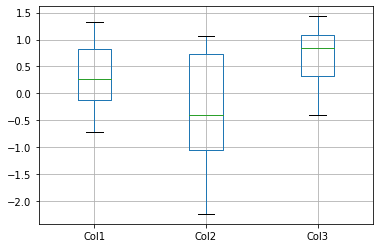

In [433]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])  

##### [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

*Compute pairwise correlation of columns, excluding NA/null values.*

In [434]:
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df.corr()

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [435]:
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


##### [drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

*Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names.*

In [436]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [437]:
df.drop(['B', 'C'], axis=1)

,A,D
0,0,3
1,4,7
2,8,11


In [438]:
df.drop(columns=['B', 'C'])

,A,D
0,0,3
1,4,7
2,8,11


In [439]:
# drop a row by index
df.drop([0, 1])

,A,B,C,D
2,8,9,10,11


##### [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

*Remove missing values.*

In [440]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]}) # pd.NaT is Not a Time, pd.nan is Not a Number.
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [441]:
# Drop the rows where at least one element is missing.
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [442]:
# Drop the columns where at least one element is missing.
df.dropna(axis='columns') # same as df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [443]:
# Drop the rows where all elements are missing.
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [444]:
# Keep rows with at least 2 non-NAs.
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [445]:
# Define in which columns to look for missing values.
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [446]:
# Keep the DataFrame with valid entries in the same variable.
df.dropna(inplace=True)
df

,name,toy,born
1,Batman,Batmobile,1940-04-25


##### [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html), [isnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)

*Return a boolean same-sized object indicating if the values are NA.*


In [447]:
df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [448]:
df.isna()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [449]:
# Show which entries in a Series are NA.
df['toy'].isna()

0     True
1    False
2    False
Name: toy, dtype: bool

isnull() is an alias for isna()

In [450]:
df.isnull() # same as df.isna()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


##### [notna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html), [notnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notnull.html)

*Return a boolean same-sized object indicating if the values are not NA.*


In [451]:
df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [452]:
df.notna()

,age,born,name,toy
0,True,False,True,False
1,True,True,True,True
2,False,True,True,True


In [453]:
# Show which entries in a Series are not NA.
df['name'].notna() # empty string is not considered as na

0    True
1    True
2    True
Name: name, dtype: bool

notnull() is an alias for notna()

In [454]:
df.notnull() # same as df.notna()

,age,born,name,toy
0,True,False,True,False
1,True,True,True,True
2,False,True,True,True


##### [reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

*Reset the index of the DataFrame, and use the default one instead. *

In [455]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [456]:
df.reset_index()

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [457]:
df.reset_index(drop=True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


##### [replace()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

*Replace values given in to_replace with other values dynamically*

In [458]:
s = pd.Series([1, 2, 3, 4, 5])
s.replace(1, 5)

0    5
1    2
2    3
3    4
4    5
dtype: int64

First parameter is *to_replace* (None by default), and second parameter is *value* to replace with (None by default)

In [459]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df.replace(0, 5)

,A,B,C
0,5,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


Replace list of values

In [460]:
df.replace([0, 1, 2, 3], 4)

,A,B,C
0,4,5,a
1,4,6,b
2,4,7,c
3,4,8,d
4,4,9,e


In [461]:
# Replace a list of values from another list
df.replace([0, 1, 2, 3], [4, 3, 2, 1])

,A,B,C
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e


Replace values from a dictionary

In [462]:
df.replace({0: 10, 1: 100})

,A,B,C
0,10,5,a
1,100,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [463]:
df.replace({'A': 0, 'B': 5}, 100) # Columns are keys.

,A,B,C
0,100,100,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [464]:
df.replace({'A': {0: 100, 4: 400}})

,A,B,C
0,100,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,400,9,e


Replace regular expression

In [465]:
df = pd.DataFrame({'A': ['bat', 'foo', 'bait'],
                   'B': ['abc', 'bar', 'xyz']})
df.replace(to_replace=r'^ba.$', value='new', regex=True)

,A,B
0,new,abc
1,foo,new
2,bait,xyz


In [466]:
df.replace({'A': r'^ba.$'}, {'A': 'new'}, regex=True)

,A,B
0,new,abc
1,foo,bar
2,bait,xyz


In [467]:
s = pd.Series([10, 'a', 'a', 'b', 'a'])
s.replace('a', 11)

0    10
1    11
2    11
3     b
4    11
dtype: object

In [468]:
s.replace('a') # forward fill

0    10
1    10
2    10
3     b
4     b
dtype: object

##### [transpose()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html)

*Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. The property T is an accessor to the method transpose().*

In [469]:
d1 = {'col1': [1, 2], 'col2': [3, 4]}
df1 = pd.DataFrame(data=d1)
df1

,col1,col2
0,1,3
1,2,4


In [470]:
df1_transposed = df1.transpose() # or df1.T
df1_transposed

,0,1
col1,1,2
col2,3,4


The property T is an accessor to this method

##### [hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

*Make a histogram of the DataFrame’s columns, using matplotlib.pyplot.hist().*


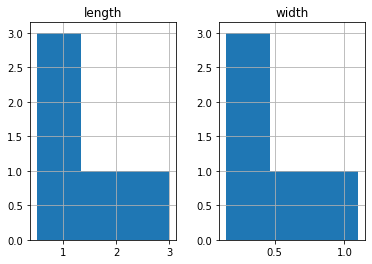

In [471]:
df = pd.DataFrame({
    'length': [1.5, 0.5, 1.2, 0.9, 3],
    'width': [0.7, 0.2, 0.15, 0.2, 1.1]
    }, index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
hist = df.hist(bins=3)

##### [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

*Return the sum of the values over the requested axis.  Equivalent to the method numpy.sum.*

In [472]:
s = pd.Series([4, 2, 0, 8, np.nan], name='legs')
s # skipna is True by default

0    4.0
1    2.0
2    0.0
3    8.0
4    NaN
Name: legs, dtype: float64

In [473]:
s.sum(skipna=False)

nan

##### [mean()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html), [median()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)

*Return the mean and median respectively of the values over the requested axis.*

##### [var()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)

*Return unbiased variance over requested axis.*

*Normalized by N-1 by default. This can be changed using the ddof argument.*

In [474]:
df = pd.DataFrame({'person_id': [0, 1, 2, 3],
                  'age': [21, 25, 62, 43],
                  'height': [1.61, 1.87, 1.49, 2.01]}
                 ).set_index('person_id')
df

,age,height
person_id,,
0,21,1.61
1,25,1.87
2,62,1.49
3,43,2.01


In [475]:
df.var() # Sample variance

age       352.916667
height      0.056367
dtype: float64

In [476]:
df.var(ddof=0) # Population variance

age       264.687500
height      0.042275
dtype: float64

##### [std()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html)

*Return sample standard deviation over requested axis.*

*Normalized by N-1 by default. This can be changed using the ddof argument.*

In [477]:
df = pd.DataFrame({'person_id': [0, 1, 2, 3],
                  'age': [21, 25, 62, 43],
                  'height': [1.61, 1.87, 1.49, 2.01]}
                 ).set_index('person_id')
df

,age,height
person_id,,
0,21,1.61
1,25,1.87
2,62,1.49
3,43,2.01


In [478]:
df.std() # Sample std. deviation

age       18.786076
height     0.237417
dtype: float64

In [479]:
df.std(ddof=0) # Population std. deviation

age       16.269219
height     0.205609
dtype: float64

##### [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*Group DataFrame using a mapper or by a Series of columns.*

*A groupby operation involves some combination of splitting the object, applying a function, and combining the results.*

In [480]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [481]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [482]:
l = [["a", 12, 12], [None, 12.3, 33.], ["b", 12.3, 123], ["a", 1, 1]]
df = pd.DataFrame(l, columns=["a", "b", "c"])
df

,a,b,c
0,a,12.0,12.0
1,None,12.3,33.0
2,b,12.3,123.0
3,a,1.0,1.0


In [483]:
df.groupby(by=["a"]).sum()

,b,c
a,,
a,13.0,13.0
b,12.3,123.0


In [484]:
df.groupby(by="a", dropna=False).sum()

,b,c
a,,
a,13.0,13.0
b,12.3,123.0
NaN,12.3,33.0


##### [where()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html)

*Replace values where the condition is False.*

*For each element in the calling DataFrame, if cond is True the element is used; otherwise the corresponding element from the DataFrame other is used.*

*Note that in NumPy, where() method behaves differently, and takes 3 arguments*

In [485]:
s = pd.Series(range(5))
s.where(s > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [486]:
s.where(s > 1, 10)

0    10
1    10
2     2
3     3
4     4
dtype: int64

In [487]:
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [488]:
m = df % 3 == 0
df.where(m, -df)

,A,B
0,0,-1
1,-2,3
2,-4,-5
3,6,-7
4,-8,9


##### [sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

*Sort by the values along either axis.*

In [489]:
df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
df

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [490]:
# Sort by col1
df.sort_values(by=['col1'])

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [491]:
# sort by multiple columns
df.sort_values(by=['col1', 'col2'])

,col1,col2,col3,col4
1,A,1,1,B
0,A,2,0,a
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [492]:
# Sort in descending order
df.sort_values(by='col1', ascending=False)

,col1,col2,col3,col4
4,D,7,2,e
5,C,4,3,F
2,B,9,9,c
0,A,2,0,a
1,A,1,1,B
3,NaN,8,4,D


In [493]:
# Sorting with a key function
df.sort_values(by='col4', key=lambda col: col.str.lower())

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


### [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

*One-dimensional ndarray with axis labels (including time series).*

*Labels need not be unique but must be a hashable type.*

#### Examples

In [494]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [495]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['x', 'y', 'z'])
ser

x   NaN
y   NaN
z   NaN
dtype: float64

In [496]:
r = np.array([1, 2]) # a simple list [1, 2] also works
ser = pd.Series(r, copy=False)
ser.iloc[0] = 999
ser

0    999
1      2
dtype: int64

#### Methods

##### [to_frame()](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)

*Convert Series to DataFrame.*

In [497]:
s = pd.Series(["a", "b", "c"],
              name="vals")
s.to_frame()

,vals
0,a
1,b
2,c


##### [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

*Return a Series containing counts of unique values.*

*The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.*

In [498]:
index = pd.Index([3, 1, 2, 3, 4, np.nan])
index.value_counts()

3.0    2
1.0    1
2.0    1
4.0    1
dtype: int64

In [499]:
# With normalize set to True, returns the relative frequency by dividing all values by the sum of values.
s = pd.Series([3, 1, 2, 3, 4, np.nan])
s.value_counts(normalize=True)

3.0    0.4
1.0    0.2
2.0    0.2
4.0    0.2
dtype: float64

In [500]:
# Counting in bins
s.value_counts(bins=3)

(0.996, 2.0]    2
(2.0, 3.0]      2
(3.0, 4.0]      1
dtype: int64

##### [unique()](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)

*Return unique values of Series object.*


In [501]:
pd.Series([2, 1, 3, 3], name='A').unique()

array([2, 1, 3])

##### [count()](https://pandas.pydata.org/docs/reference/api/pandas.Series.count.html)

*Return number of non-NA/null observations in the Series.*

In [502]:
s = pd.Series([0.0, 1.0, np.nan])
s.count()

2

##### [replace()](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html)

*Replace values given in to_replace with other values dynamically.*

In [503]:
s = pd.Series([1, 2, 3, 4, 5])
s.replace(1, 5)

0    5
1    2
2    3
3    4
4    5
dtype: int64

In [504]:
s = pd.Series([10, 'a', 'a', 'b', 'a'])
s.replace('a')

0    10
1    10
2    10
3     b
4     b
dtype: object

##### [mean()](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html), [median()](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html)

*Return the mean and median repsectively of the values over the requested axis.*

[var()](https://pandas.pydata.org/docs/reference/api/pandas.Series.var.html), [std()](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html)

*Return unbiased variance and std. deviation repspectively over requested axis.*

*Normalized by N-1 by default. This can be changed using the ddof argument.*

##### [hist()](https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html)

*Draw histogram of the input series using matplotlib.*

### [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)

*Container object exposing keys as attributes.*

Typically returned by fetch_* APIs of sklearn.datasets.  Bunch object has the following keys in it: frame, data, target, target_names, feature_names

### [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

*Read a comma-separated values (csv) file into DataFrame.*

*Also supports optionally iterating or breaking of the file into chunks.*

In [505]:
# Downloads test.csv with no header, and two columns Col1 and Col2.
# pd.read_csv('test.csv', header=None, names=['Col1', 'Col2'])

### [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

*Concatenate pandas objects along a particular axis with optional set logic along the other axes.*

Combine two Series.

In [506]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

Clear the existing index and reset it in the result by setting the ignore_index option to True.

In [507]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

Add a hierarchical index at the outermost level of the data with the keys option.

In [508]:
pd.concat([s1, s2], keys=['s1', 's2'])

s1  0    a
    1    b
s2  0    c
    1    d
dtype: object

Label the index keys you create with the names option.

In [509]:
pd.concat([s1, s2], keys=['s1', 's2'],
          names=['Series name', 'Row ID'])

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

Combine two DataFrame objects with identical columns.

In [510]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
pd.concat([df1, df2], ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


Combine DataFrame objects with overlapping columns and return everything. Columns outside the intersection will be filled with NaN values.

In [511]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])

pd.concat([df1, df3], sort=False, ignore_index=True)

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
2,c,3,cat
3,d,4,dog


Combine DataFrame Examples with overlapping columns and return only those that are shared by passing inner to the join keyword argument.

In [512]:
pd.concat([df1, df3], join="inner", ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


Combine DataFrame Examples horizontally along the x axis by passing in axis=1.

In [513]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


In [514]:
df5 = pd.DataFrame([1], index=['a'])
df6 = pd.DataFrame([2], index=['a'])
try:
  pd.concat([df5, df6], verify_integrity=True) # Raises exception.  Opposite of ignore_index=True.
except ValueError:
  print("Exception raised!")

Exception raised!


### [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

*Convert categorical variable into dummy/indicator variables.*

In [515]:
s = pd.Series(list('abca'))
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [516]:
s1 = ['a', 'b', np.nan]
pd.get_dummies(s1)

,a,b
0,1,0
1,0,1
2,0,0


In [517]:
pd.get_dummies(s1, dummy_na=True)

,a,b,NaN
0,1,0,0
1,0,1,0
2,0,0,1


In [518]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [519]:
pd.get_dummies(pd.Series(list('abcaa')))

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0


In [520]:
pd.get_dummies(pd.Series(list('abcaa')), drop_first=True)

,b,c
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0


In [521]:
pd.get_dummies(pd.Series(list('abc')), dtype=float)

,a,b,c
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


## pandas.plotting

### [scatter_matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

*Draw a matrix of scatter plots.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c7801710>,
      dtype=object)

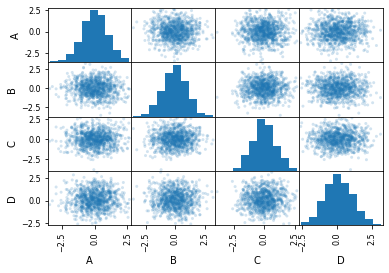

In [522]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2)

## sns

### [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

*Plot univariate or bivariate histograms to show distributions of datasets.*

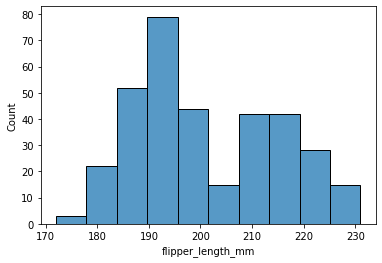

In [523]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

Flip the plot by assigning the data variable to the y axis:

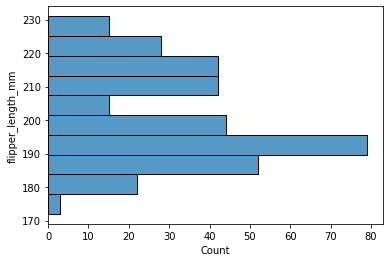

In [524]:
sns.histplot(data=penguins, y="flipper_length_mm")

Check how well the histogram represents the data by specifying a different bin width:

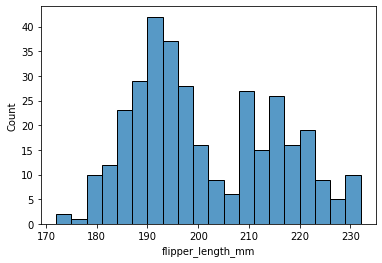

In [525]:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=3)

You can also define the total number of bins to use:

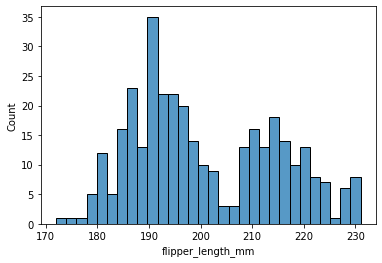

In [526]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

### [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

*Draw a scatter plot with possibility of several semantic groupings.*


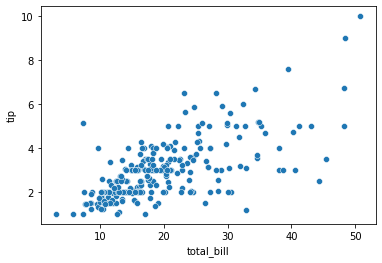

In [527]:
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip")

Assigning a variable to hue will map its levels to the color of the points:

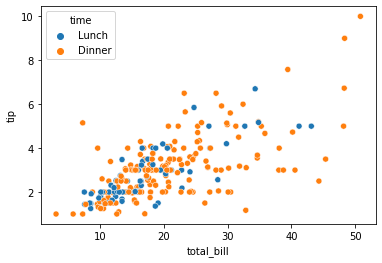

In [528]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

Pass the name of a categorical palette or explicit colors (as a Python list of dictionary) to force categorical mapping of the hue variable:

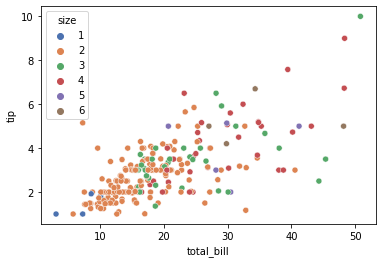

In [529]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="deep")

### [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

*Plot rectangular data as a color-encoded matrix.*

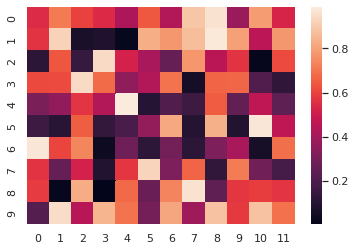

In [530]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

Plot a dataframe with meaningful row and column labels:

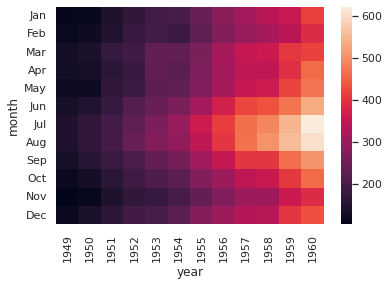

In [531]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

Annotate each cell with the numeric value using integer formatting:

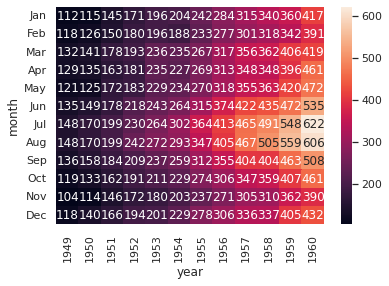

In [532]:
ax = sns.heatmap(flights, annot=True, fmt="d")

Use a different colormap:

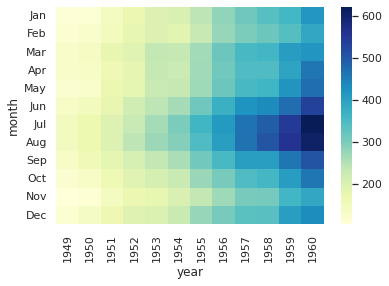

In [533]:
ax = sns.heatmap(flights, cmap="YlGnBu")

### [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

*Plot pairwise relationships in a dataset.*

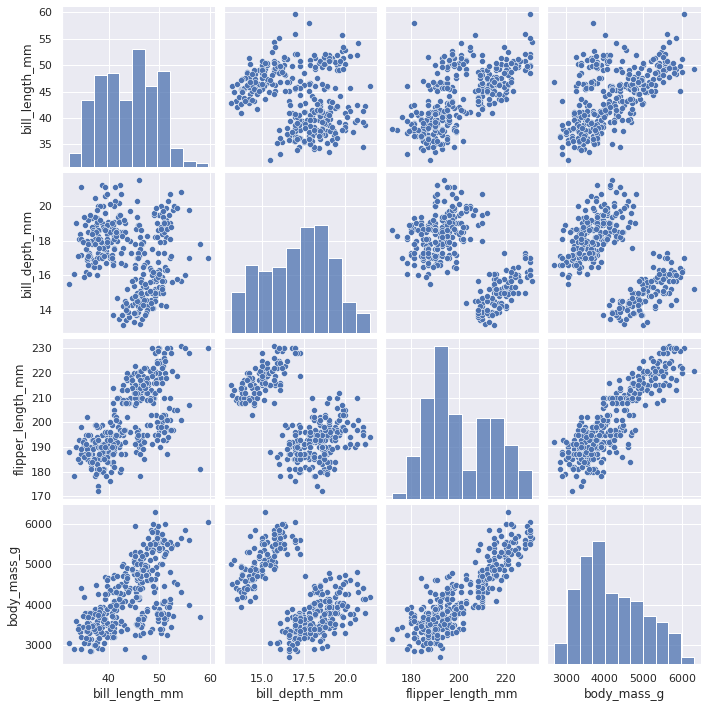

In [534]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):

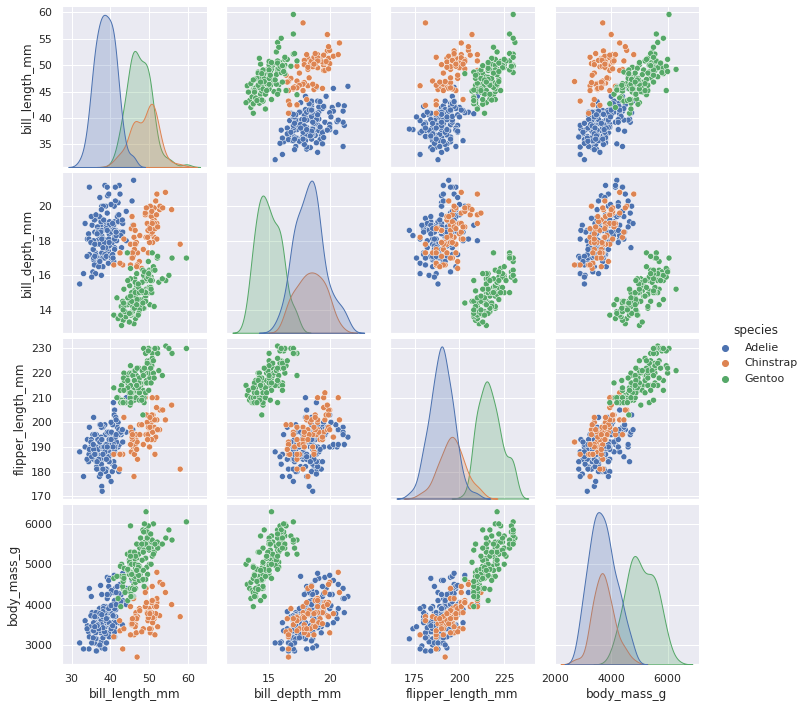

In [535]:
sns.pairplot(penguins, hue="species")

Or histplot() to draw both bivariate and univariate histograms:

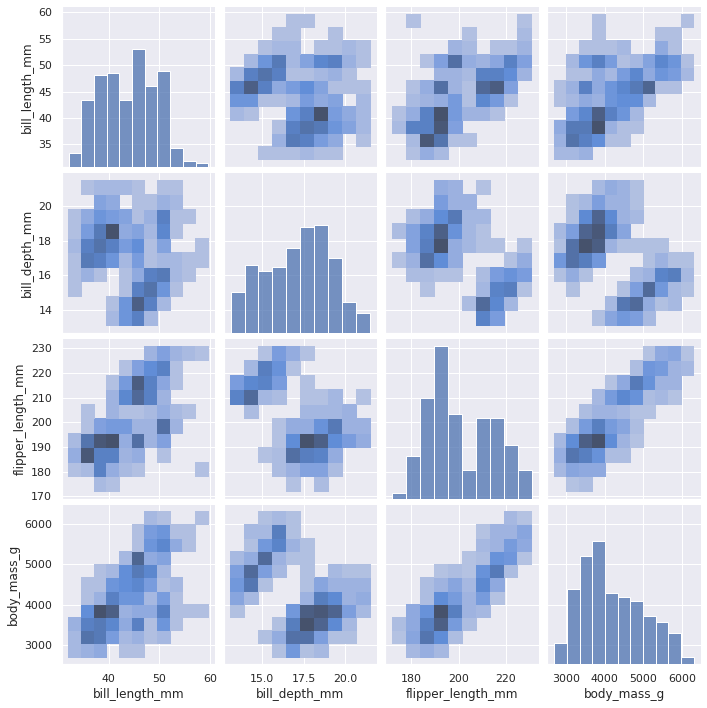

In [536]:
sns.pairplot(penguins, kind="hist")

### [set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html)

*Set the parameters that control the general style of the plots.*

*The style parameters control properties like the color of the background and whether a grid is enabled by default.*

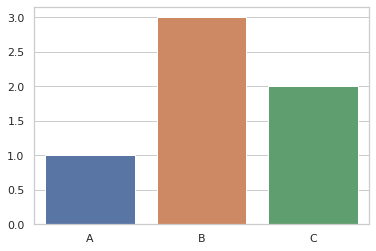

In [537]:
sns.set_style("whitegrid")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

You can also selectively override seaborn’s default parameter values:

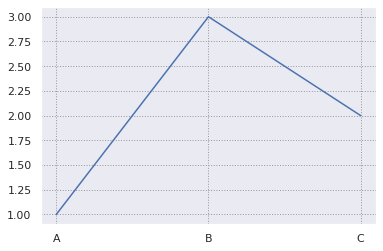

In [538]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(x=["A", "B", "C"], y=[1, 3, 2])